# load module

In [2]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
import dask.dataframe as dd

# 25 candidate maternal factors 
output: `candidate_maternal_tr_ls`

In [3]:
# select ww's 25 maternal factors and turn to transcript format
# output: candidate_maternal_tr_ls
candidate_maternal_gene_ls = ['tbpl2', 'orc1', 'ftr81', 'lmx1a', 'zgc:165514', 
                              'si:dkey-208k4.2', 'CU929037.1', 'zgc:113424', 'zgc:114123', 
                              'mcm3l', 'mcm6l', 'npm2a', 'zgc:152977', 'cita', 
                              'si:ch211-286b5.4', 'zgc:56231', 'si:ch211-119o8.6', 'zglp1', 'figla',
                              'e2f5', 'rnf17', 'pias4b', 'stk31', 'ccdc172', 'kank1b']
        
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.genePredExt'
tr_gene_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
tr_gene_pd = tr_gene_pd.iloc[:,[0,11]]
tr_gene_pd.columns = ['transcript_id', 'gene_id']
finame = '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.txt'
gene_symbol_pd = pd.read_table(finame, header=None, sep="\t", encoding="utf-8")
gene_symbol_pd.columns = ['gene_id', 'gene_symbol']
tr_gene_symbol_pd = pd.merge(tr_gene_pd, gene_symbol_pd, on="gene_id")

candidate_maternal_trid_geneid_sym = tr_gene_symbol_pd.loc[tr_gene_symbol_pd["gene_symbol"].isin(candidate_maternal_gene_ls)]
tr_gene_symbol_pd.head()

,transcript_id,gene_id,gene_symbol
0,ENSDART00000164359.1,ENSDARG00000099104.1,rpl24
1,ENSDART00000158290.1,ENSDARG00000099104.1,rpl24
2,ENSDART00000157701.1,ENSDARG00000099104.1,rpl24
3,ENSDART00000167898.1,ENSDARG00000099104.1,rpl24
4,ENSDART00000166393.1,ENSDARG00000102407.2,cep97


In [4]:
candidate_maternal_trid_geneid_sym['transcript_id_clean'] = list(zip(*candidate_maternal_trid_geneid_sym['transcript_id'].str.split('.')))[0]
candidate_maternal_trid_geneid_sym.head()

<ipython-input-4-7f067f70966f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidate_maternal_trid_geneid_sym['transcript_id_clean'] = list(zip(*candidate_maternal_trid_geneid_sym['transcript_id'].str.split('.')))[0]


,transcript_id,gene_id,gene_symbol,transcript_id_clean
2479,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687
2480,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504
2481,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121
2482,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769
2483,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282


In [5]:
tr_gene_pd_clean = pd.DataFrame(zip(list(zip(*tr_gene_symbol_pd['transcript_id'].str.split('.')))[0], list(zip(*tr_gene_symbol_pd['gene_id'].str.split('.')))[0]))
tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean']
tr_gene_pd_clean

,transcript_id_clean,gene_id_clean
0,ENSDART00000164359,ENSDARG00000099104
1,ENSDART00000158290,ENSDARG00000099104
2,ENSDART00000157701,ENSDARG00000099104
3,ENSDART00000167898,ENSDARG00000099104
4,ENSDART00000166393,ENSDARG00000102407
...,...,...
65835,ENSDART00000183313,ENSDARG00000114956
65836,ENSDART00000183313,ENSDARG00000114956
65837,ENSDART00000183313,ENSDARG00000114956
65838,ENSDART00000183313,ENSDARG00000114956


In [6]:
gene_symbol_clean = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11.ensGeneToGeneSymbol.clean.txt', header=None, 
                                sep = '\t')
gene_symbol_clean.columns = ['gene_id_clean', 'gene_symbol']
gene_symbol_clean

,gene_id_clean,gene_symbol
0,ENSDARG00000099104,rpl24
1,ENSDARG00000102407,cep97
2,ENSDARG00000102097,nfkbiz
3,ENSDARG00000099319,CU651657.1
4,ENSDARG00000099640,eed
...,...,...
32515,ENSDARG00000109919,CABZ01025162.1
32516,ENSDARG00000116629,CT025651.2
32517,ENSDARG00000114977,CT025651.1
32518,ENSDARG00000102423,FO818711.1


# read in .csv

## raw

In [8]:
# read in .tsv

os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon')
expr_raw_dict = {}
for expression_type in ['TPM'] :
    for finame in [f'ovary_earlyEmbryo_sample_exon_{expression_type}.tsv',
                   f'lateEmbryo_tissue_sample_exon_{expression_type}.tsv'] :
        expr_pd = dd.read_csv(finame, header=0, sep="\t", encoding="utf-8")
        expr_pd.index = expr_pd['exon_id'].astype('category')
        k = f'{finame[:17]}_{expression_type}'
        expr_raw_dict[k] = expr_pd.drop('exon_id', axis = 1)
        expr_raw_dict[k].columns = [x.strip('X') for x in expr_raw_dict[k].columns]
        

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [9]:
expr_raw_dict['ovary_earlyEmbryo_TPM'].head()

,5mpf_ovary_rep1,ovary_rep2,oocyte_rep1,oocyte_rep2,oocyte_stage1,oocyte_stage2,oocyte_stage3,oocyte_stage4,1cell_rep1,1cell_rep2,...,elife_30860_16hpf_somites_3,elife_30860_16hpf_somites_4,elife_30860_16hpf_somites_5,elife_30860_19hpf_somites_1,elife_30860_19hpf_somites_2,elife_30860_19hpf_somites_3,elife_30860_19hpf_somites_4,elife_30860_19hpf_somites_5,20ss_allskin_rep1,20ss_allskin_rep2
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.598116,0.443765,1.869867,1.825394,0.172480,0.313268,0.156636,0.235801,0.300328,0.220884,...,0.253192,0.000000,0.342244,0.524553,0.133667,0.129435,0.000000,0.003082,0.154407,0.048470
ENSDART00000000004.5.2,8.935889,2.805869,1.089710,2.277718,2.261301,4.601290,6.237452,0.000000,4.576962,6.318503,...,2.300462,1.618648,1.827976,0.272658,1.650726,1.652978,1.238611,1.324941,0.278723,0.339015
ENSDART00000000004.5.3,21.444956,7.343146,7.703125,6.468347,4.130007,8.499166,5.400085,1.601061,9.136024,8.890978,...,1.745558,1.552668,1.112506,0.378897,1.294312,1.179526,1.156829,1.268553,0.673836,1.009955
ENSDART00000000004.5.4,0.000000,1.075339,0.000000,0.000000,0.832566,0.420243,1.254364,0.000000,1.490353,1.770097,...,0.000000,0.514028,0.000000,0.000000,0.000000,0.046316,0.000000,0.674387,0.551872,0.000000
ENSDART00000000004.5.5,0.000000,2.441845,0.000000,0.447126,4.415289,4.383535,2.336897,0.388471,9.125546,9.414843,...,0.000000,0.000000,0.000000,1.087209,0.000000,0.465374,0.847983,0.477121,0.000000,0.126448


In [10]:
expr_raw_dict['lateEmbryo_tissue_TPM'].head()

,24hpf_pgc_rep1,24hpf_pgc_rep2,24hpf_pgc_rep3,24hpf_pgc_rep4,24hpf_rep1,24hpf_rep2,24hpf_rep3,24hpf_rep4,24hpf_rep5,24hpf_rep6,...,ventricle_rep1,ventricle_rep2,ventricle_rep3,ventricle_rep4,ventricle_rep5,testis_rep1,testis_rep2,testis_rep3,testis_rep4,testis_rep5
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,0.409856,0.221467,0.405261,0.234795,0.048692,0.242575,0.000000,0.104251,0.165486,0.078682,...,0.597491,0.025104,0.191853,0.552912,0.166538,0.128866,0.085461,0.142070,0.054256,0.025338
ENSDART00000000004.5.2,0.066284,0.000000,0.000000,0.000000,0.365912,0.758942,0.923232,1.198394,0.677705,1.005904,...,1.907082,1.031614,2.077567,1.095901,0.333522,1.548524,0.546727,2.052305,1.898496,1.361721
ENSDART00000000004.5.3,0.789260,0.364873,0.531433,0.051315,1.030213,0.876635,0.466255,0.668134,0.971908,0.528677,...,1.067730,0.684711,1.358157,1.535385,0.608713,1.051416,0.759317,1.334506,1.397835,1.384735
ENSDART00000000004.5.4,0.000000,0.000000,0.000000,0.000000,0.466020,0.437540,0.000000,0.228559,0.708509,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.374180,0.000000
ENSDART00000000004.5.5,0.000000,0.000000,0.000000,0.050825,1.156162,1.083502,0.623839,0.308247,0.128185,0.720202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.661474,0.342329,0.808159,1.451543,1.097929


In [11]:
expr_raw_dict[k].mean().compute()

24hpf_pgc_rep1    3.101593
24hpf_pgc_rep2    3.101593
24hpf_pgc_rep3    3.101593
24hpf_pgc_rep4    3.101593
24hpf_rep1        3.101593
                    ...   
testis_rep1       3.101593
testis_rep2       3.101593
testis_rep3       3.101593
testis_rep4       3.101593
testis_rep5       3.101593
Length: 208, dtype: float64

## batch effect removed

In [7]:
# read in .tsv

os.chdir('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon')
expr_combat_dict = {}
for expression_type in ['TPM'] :
    for finame in [f'ovary_earlyEmbryo_exon_{expression_type}_matrix_exOvary_ComBatSeq_byBatch.csv', 
                   f'lateEmbryo_tissue_exon_{expression_type}_matrix_exOvary_ComBatSeq_byBatch.csv'] :
        expr_pd = dd.read_csv(finame, header=0, sep=",", encoding="utf-8")
        expr_pd['exon_id'] = expr_pd['Unnamed: 0'].str.split('|', expand = True, n = 1)[0]
#         expr_3id = dd.merge(expr_pd.drop('Unnamed: 0', axis = 1), exon_tr_gene_pd_clean, on="exon_id")
        expr_3id = expr_pd.drop('Unnamed: 0', axis = 1)
        expr_3id.index = expr_3id['exon_id'].astype('category')
#         expr_3id['transcript_id_clean'] = expr_3id['transcript_id_clean'].astype('category')
#         expr_3id['gene_id_clean'] = expr_3id['gene_id_clean'].astype('category')
        k = f'{finame[:17]}_{expression_type}'
        expr_combat_dict[k] = expr_3id.drop('exon_id', axis = 1)
        expr_combat_dict[k].columns = [x.strip('X') for x in expr_combat_dict[k].columns]
        

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [8]:
expr_combat_dict.keys()

dict_keys(['ovary_earlyEmbryo_TPM', 'lateEmbryo_tissue_TPM'])

In [9]:
ovary_earlyEmbryo_TPM_stages = ['ovary'] * 2 + ['oocyte'] * 6 + ['1_cell'] * 12 + ['2_cell'] * 5 + ['4_cell'] * 2 + ['24_cell'] * 2 + ['64_cell'] * 2 + ['128_cell'] * 5 + ['256_cell'] * 3 + ['1k_cell'] * 9 + ['high'] * 5 + ['oblong'] * 1 + ['4hpf'] * 4 + ['sphere'] * 2 + ['dome'] * 9 + ['50epi'] * 5 + ['6hpf'] * 5 + ['shield'] * 5 + ['7hpf'] * 8 + ['8hpf'] * 5 + ['bud'] * 2 + ['10.33hpf'] * 5 + ['16hpf'] * 5 + ['19hpf'] * 5 + ['20ss'] * 2
ovary_earlyEmbryo_TPM_stages_uniq = ['ovary'] + ['oocyte'] + ['1_cell'] + ['2_cell'] + ['4_cell'] + ['24_cell'] + ['64_cell'] + ['128_cell'] + ['256_cell'] + ['1k_cell'] + ['high'] + ['oblong'] + ['4hpf'] + ['sphere'] + ['dome'] + ['50epi'] + ['6hpf'] + ['shield'] + ['7hpf'] + ['8hpf'] + ['bud'] + ['10.33hpf'] + ['16hpf'] + ['19hpf'] + ['20ss']

lateEmbryo_tissue_TPM_stages = ['24hpf'] * 19 + ['28hpf'] * 5 + ['30hpf'] * 5 + ['36hpf'] * 24 + ['48hpf'] * 7 + ['52hpf'] * 8 + ['56hpf'] * 2 + ['3dpf'] * 23 + ['4dpf'] * 28 + ['5dpf'] * 18 + ['6dpf'] * 7 + ['3wpf'] * 3 + ['2mpf'] * 2 + ['3mpf'] * 5 + ['epidermis_cLCs'] * 4 + ['epidermis_Keratinocytes'] * 3 + ['epidermis_MLCs'] * 4 + ['epidermis_Neutrophils'] * 3 + ['epidermis_T_cell'] * 3 + ['kidney'] * 7 + ['liver'] * 9 + ['muscle'] * 3 + ['retina_muller'] * 3 + ['valve'] * 3 + ['ventricle'] * 5 + ['testis'] * 5
lateEmbryo_tissue_TPM_stages_uniq = ['24hpf'] + ['28hpf'] + ['30hpf'] + ['36hpf'] + ['48hpf'] + ['52hpf'] + ['56hpf'] + ['3dpf'] + ['4dpf'] + ['5dpf'] + ['6dpf'] + ['3wpf'] + ['2mpf'] + ['3mpf'] + ['epidermis_cLCs'] + ['epidermis_Keratinocytes'] + ['epidermis_MLCs'] + ['epidermis_Neutrophils'] + ['epidermis_T_cell'] + ['kidney'] + ['liver'] + ['muscle'] + ['retina_muller'] + ['valve'] + ['ventricle'] + ['testis']
    
# lateEmbryo_tissue_TPM_samples = ['_'.join(x.split('_')[:-1]) for x in expr_combat_dict['lateEmbryo_tissue_TPM'].columns[:-2].tolist()]
lateEmbryo_tissue_TPM_samples = ['_'.join(x.split('_')[:-1]) for x in expr_combat_dict['lateEmbryo_tissue_TPM'].columns.tolist()]
lateEmbryo_tissue_TPM_samples = lateEmbryo_tissue_TPM_samples[:38] + ['36hpf_sample1'] * 3 + ['36hpf_sample2'] * 3 + lateEmbryo_tissue_TPM_samples[44:121] + ['5dpf_sample1'] * 2 + lateEmbryo_tissue_TPM_samples[123:125] + ['5dpf_sample2'] * 3 + lateEmbryo_tissue_TPM_samples[128:]
lateEmbryo_tissue_TPM_samples_uniq = pd.Series(lateEmbryo_tissue_TPM_samples).drop_duplicates().tolist()
len(lateEmbryo_tissue_TPM_samples_uniq)

71

In [10]:
print(ovary_earlyEmbryo_TPM_stages_uniq)

['ovary', 'oocyte', '1_cell', '2_cell', '4_cell', '24_cell', '64_cell', '128_cell', '256_cell', '1k_cell', 'high', 'oblong', '4hpf', 'sphere', 'dome', '50epi', '6hpf', 'shield', '7hpf', '8hpf', 'bud', '10.33hpf', '16hpf', '19hpf', '20ss']


In [11]:
print(lateEmbryo_tissue_TPM_samples_uniq)

['24hpf_pgc', '24hpf', '24hpf_somatic', 'elife_30860_24hpf', '28hpf', 'elife_30860_30hpf', '36hpf_endothelial', '36hpf_HSPC', '36hpf_neural_crest', '36hpf_NHC', '36hpf_sample1', '36hpf_sample2', 'elife_30860_36hpf', '36hpf_pgc', '36hpf_somatic', '2dpf', 'elife_30860_2dpf', '52hpf_allskin', '52hpf_basal', '52hpf_CHT_NHC', '52hpf_periderm', '56hpf_heart', '3dpf_CHT_endothelial', '3dpf_CHT_HSPC', '3dpf_CHT_NHC', '3dpf_kidney', '72hpf_allskin', '72hpf_basal', '72hpf_neural_crest', '72hpf_periderm', 'elife_30860_3dpf', '4dpf_CHT_endothelial', '4dpf_CHT_HSPC', '4dpf_CHT_NHC', '4dpf_endothelial', '4dpf_podocytes', '4dpf_vascular_muscle_acta2_n_fosc1b_n', '4dpf_vascular_muscle_acta2_n', '4dpf_vascular_muscle_acta2_p_fosc1b_p', '4dpf_vascular_muscle_acta2_p', 'elife_30860_4dpf', '5dpf_sample1', '5dpf_beta', '5dpf_sample2', '5dpf_vascular_muscle_kdrl_n', '5dpf_vascular_muscle_kdrl_p', 'elife_30860_5dpf', '6dpf_IEC', '6dpf_LRE', '6dpf', '3wpf', '2mpf_liver', '3mpf_heart', '3mpf_kidney_HSPC', '3mp

In [12]:
len(lateEmbryo_tissue_TPM_samples)

208

# corr heatmap

## batch effect removed by batch

<ipython-input-23-dafadf1f247d>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(tight_layout = True, figsize=(4+corr.shape[0]*.5, 5+corr.shape[1]*.5))


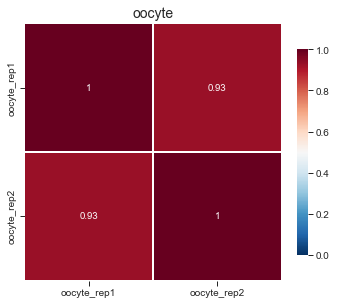

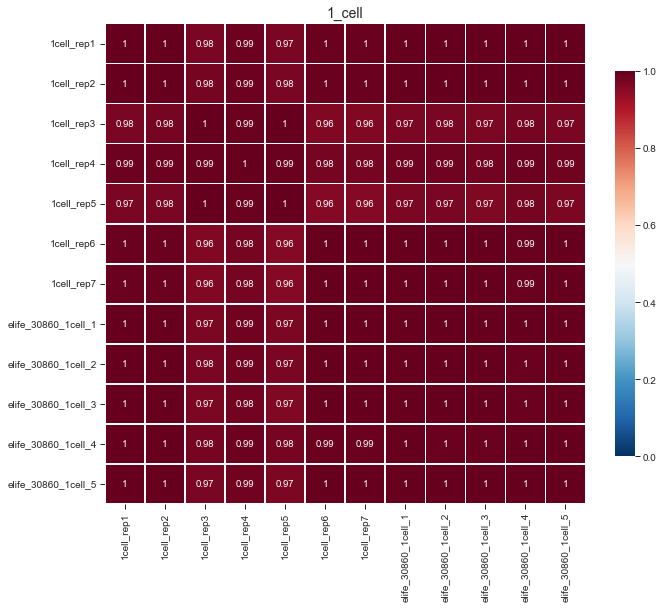

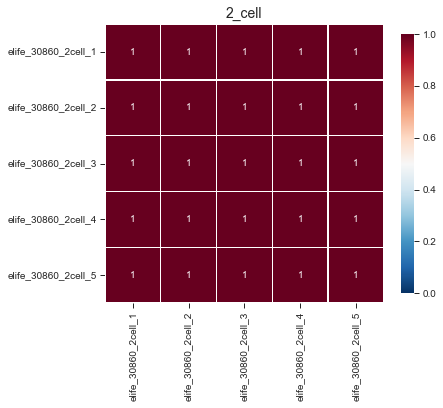

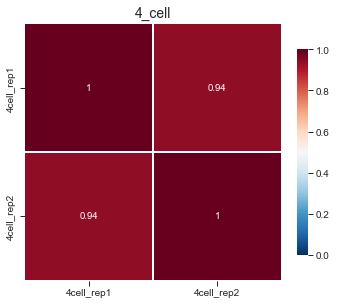

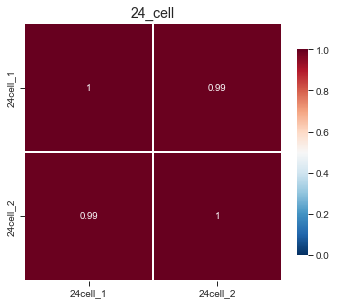

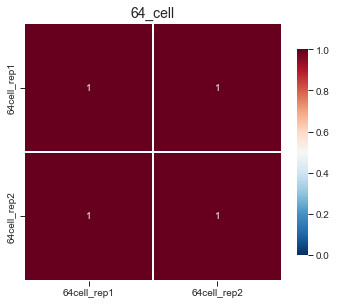

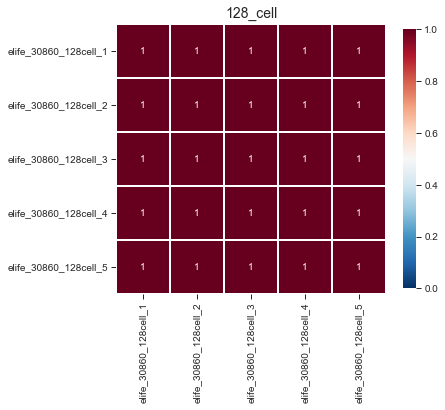

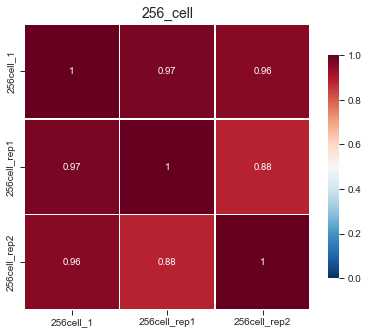

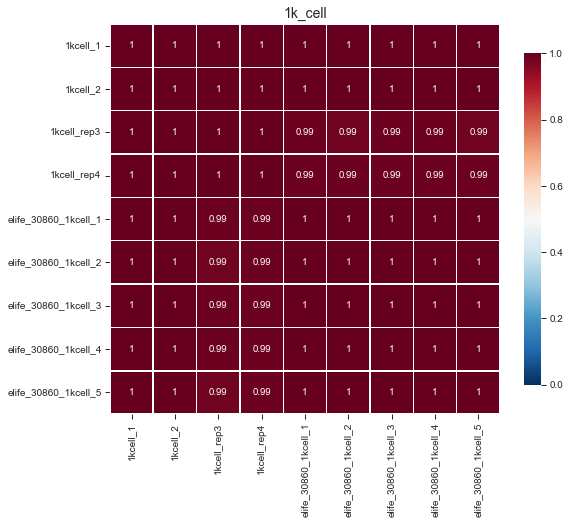

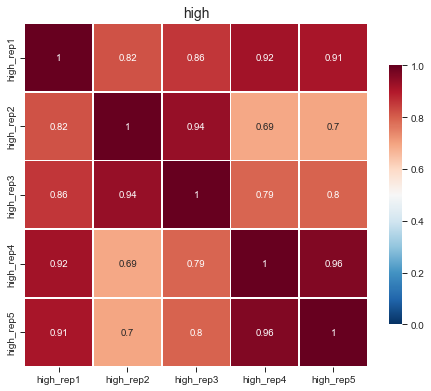

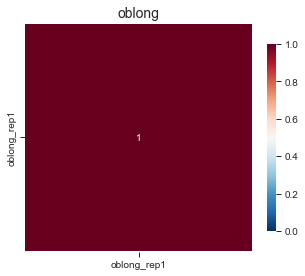

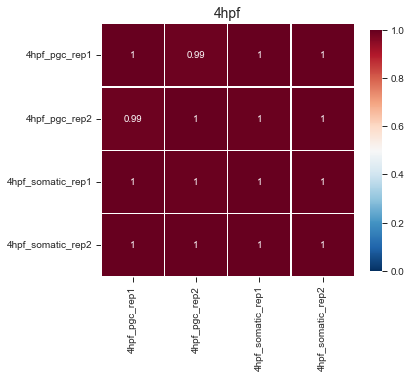

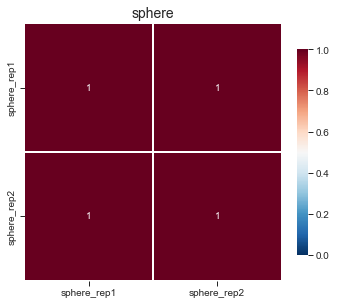

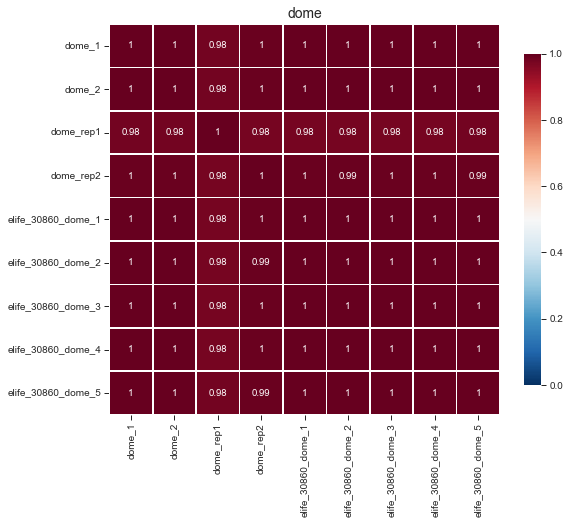

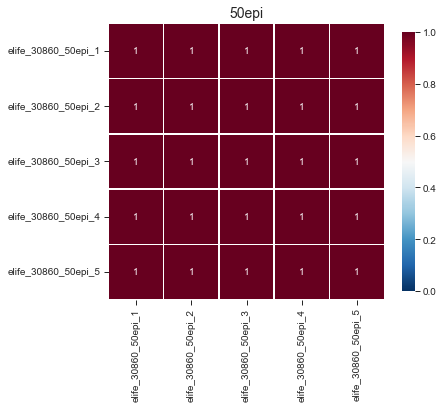

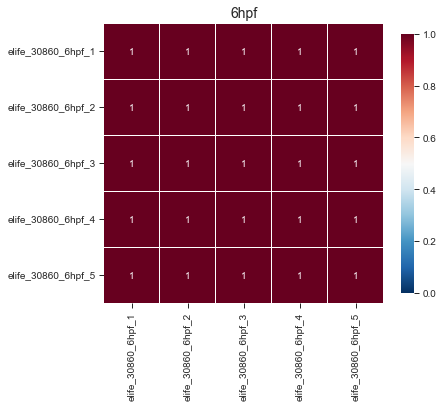

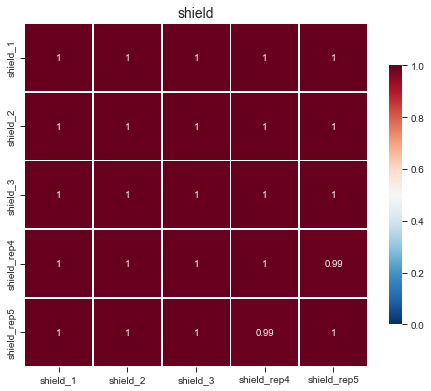

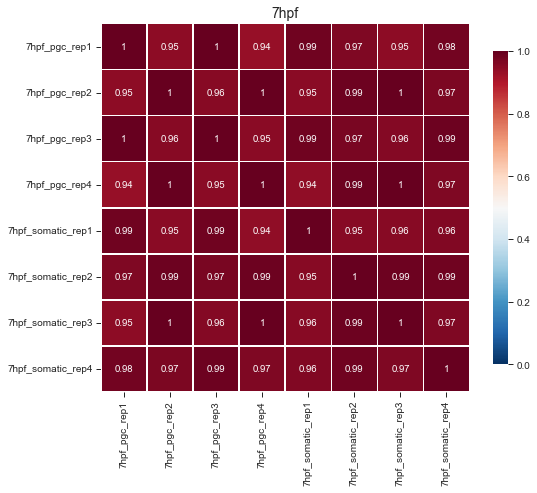

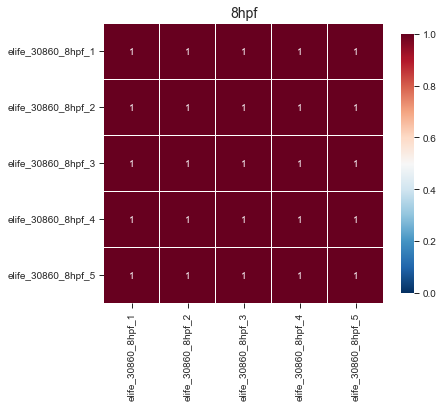

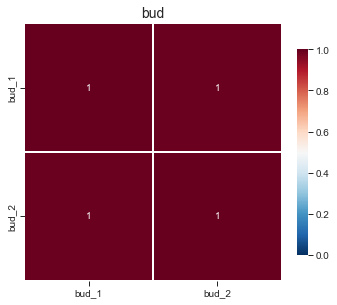

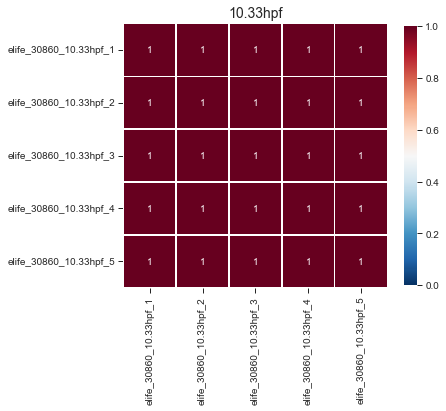

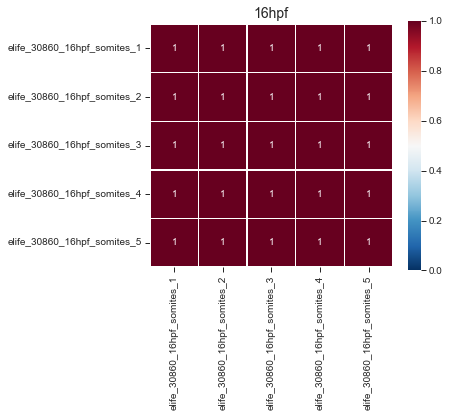

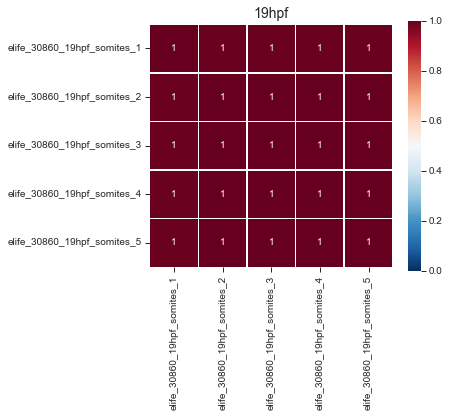

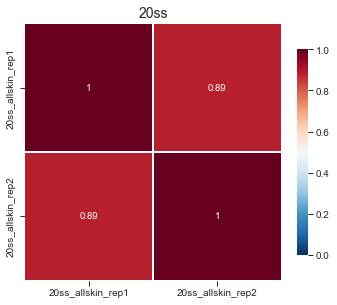

In [23]:
with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make1_repCorr_embryo_TPM_combat_byBatch.pdf') as pdf_pages :
    df_tmp = expr_combat_dict['ovary_earlyEmbryo_TPM'].compute()    
    for stage in ovary_earlyEmbryo_TPM_stages_uniq[1:] :
#     for stage in ['oocyte'] :
    
        heatmap_tpm = df_tmp.loc[:, [x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
        corr = heatmap_tpm.astype(float).corr()
        with sns.axes_style('white', rc={
                'xtick.bottom': True,
                'ytick.left': True
        }), sns.plotting_context('paper',
                                 rc={
                                     'axes.titlesize': 14,
                                     'axes.labelsize': 12,
                                     'xtick.labelsize': 10,
                                     'ytick.labelsize': 10,
                                     'legend.fontsize': 10
                                 }):
            fig, ax = plt.subplots(tight_layout = True, figsize=(4+corr.shape[0]*.5, 5+corr.shape[1]*.5))
            # Draw the heatmap with the mask and correct aspect ratio
            g = sns.heatmap(corr,
                        #mask=mask,
                        cmap='RdBu_r',
                        vmin=0,
                        vmax=1,
                        square=True,
                        linewidths=.5,
                        cbar_kws={"shrink": .5},
                        annot=True,
                        ax=ax
                        )
            ax.set_title(stage)
            
            pdf_pages.savefig(fig)

<ipython-input-25-df8157fac36b>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(tight_layout = True, figsize=(4+corr.shape[0]*.5, 5+corr.shape[1]*.5))


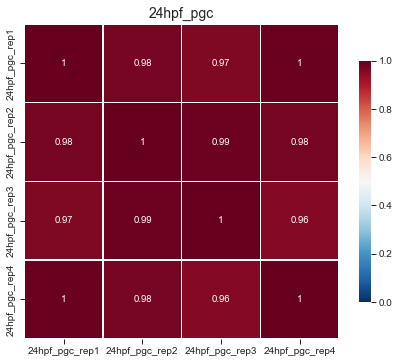

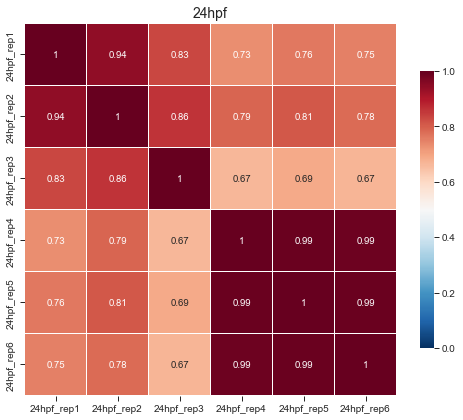

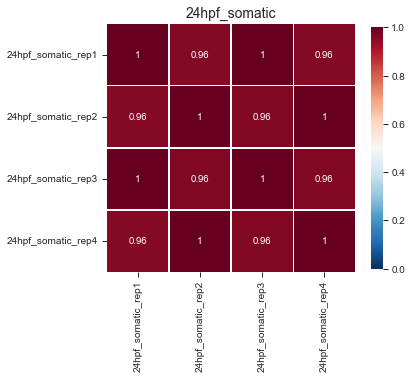

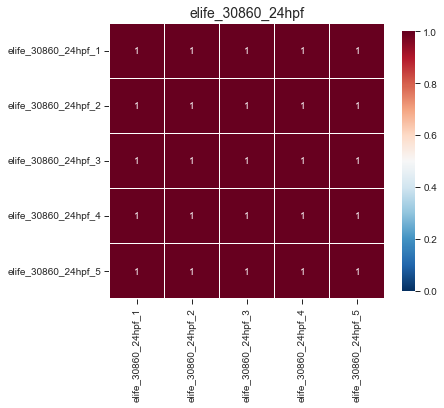

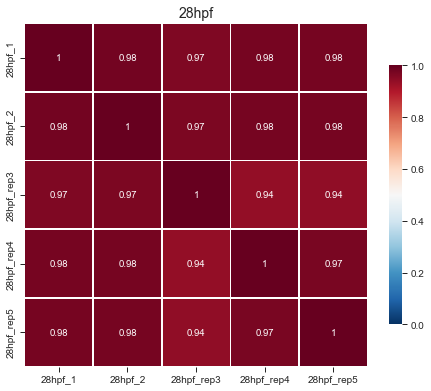

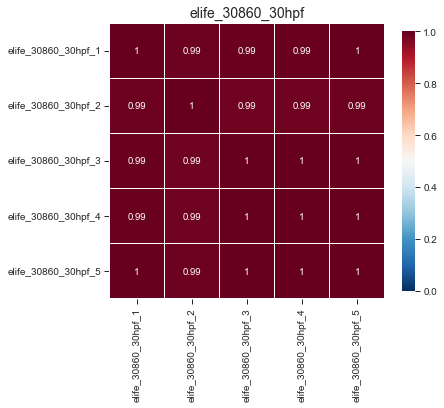

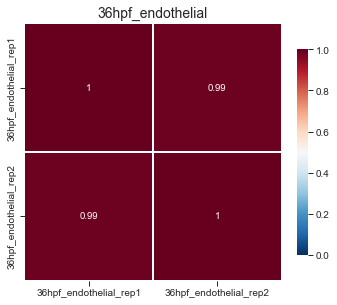

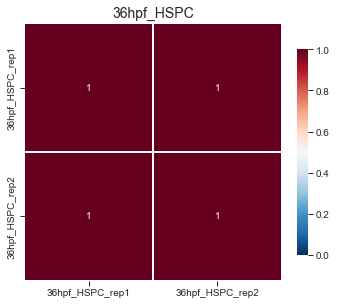

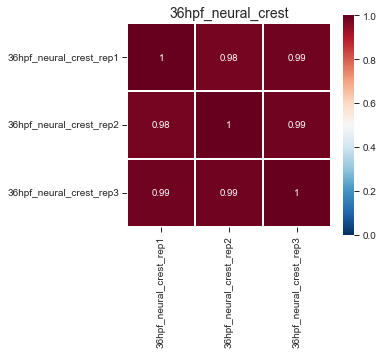

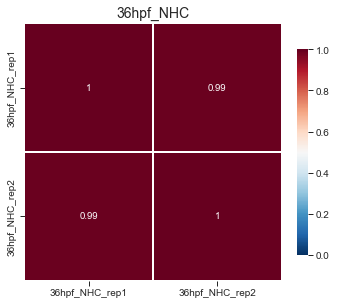

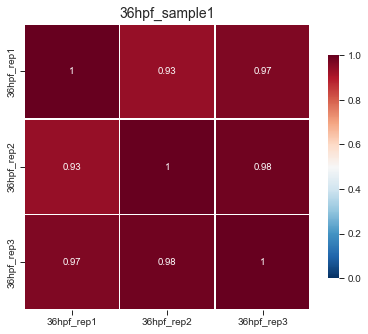

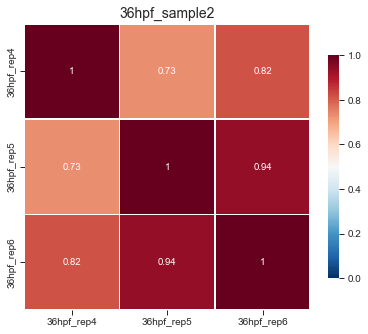

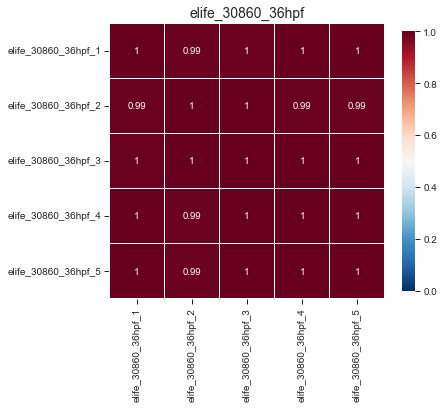

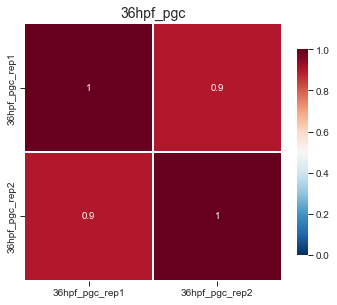

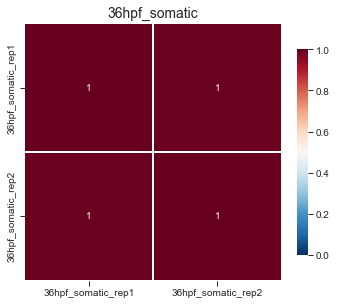

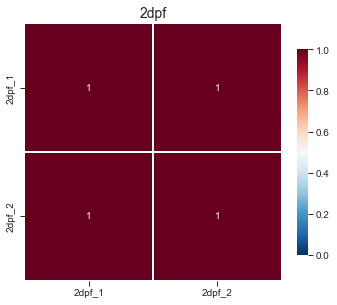

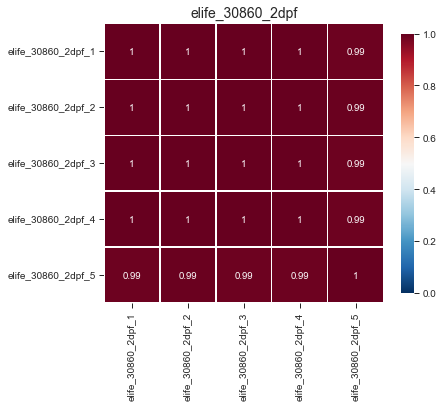

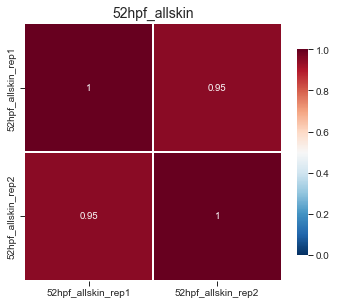

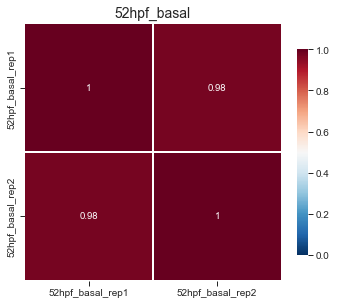

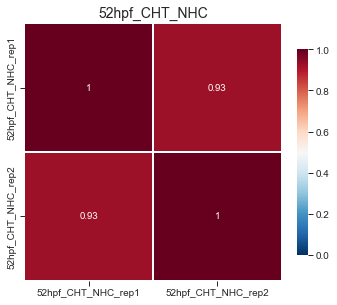

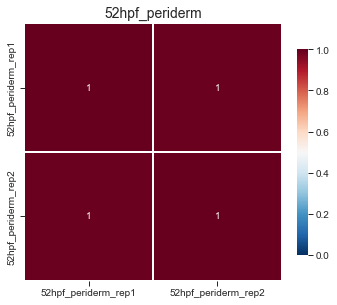

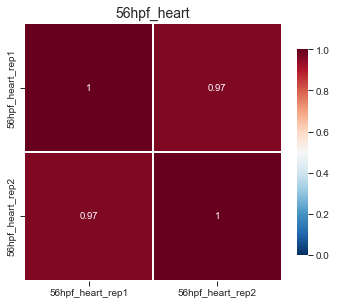

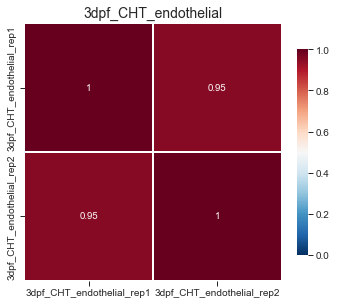

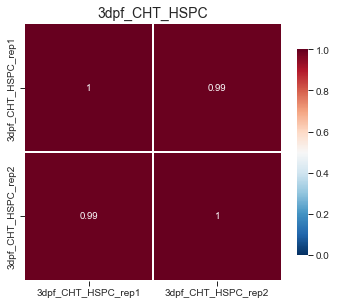

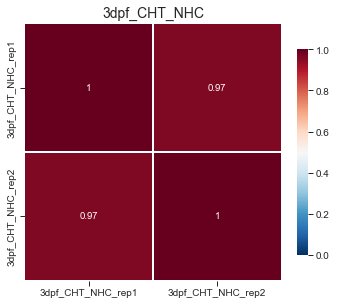

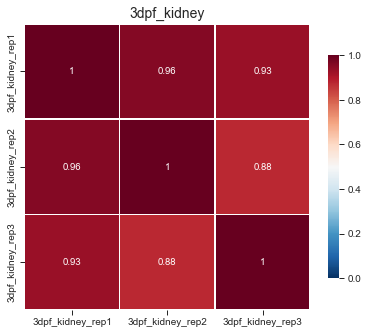

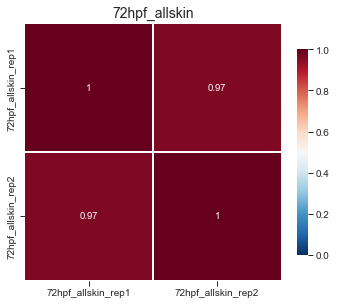

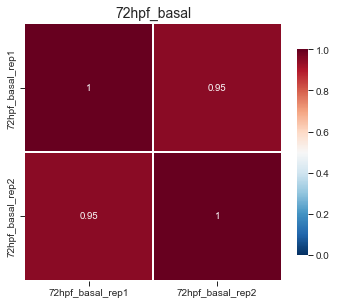

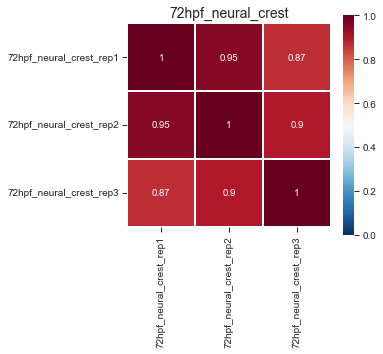

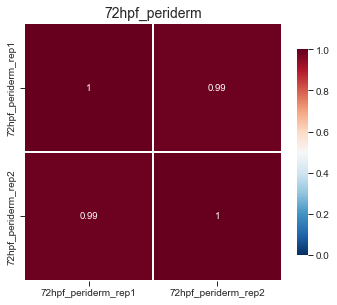

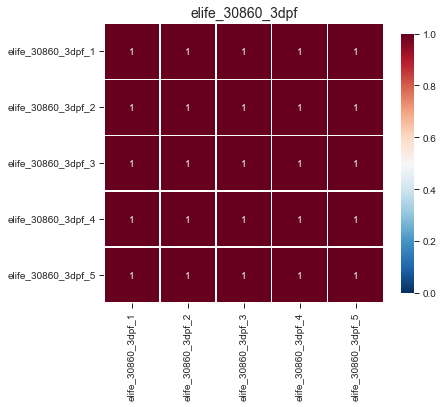

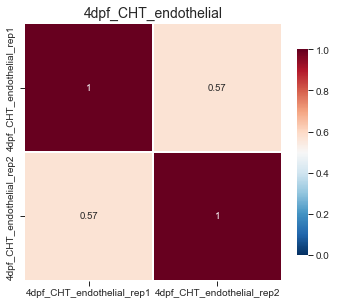

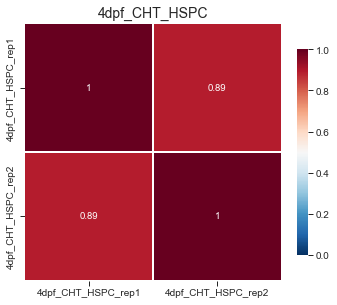

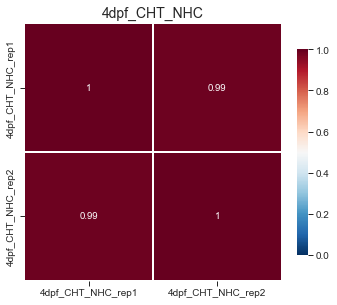

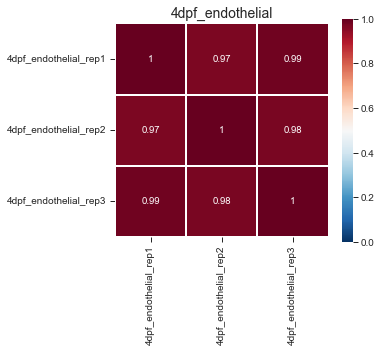

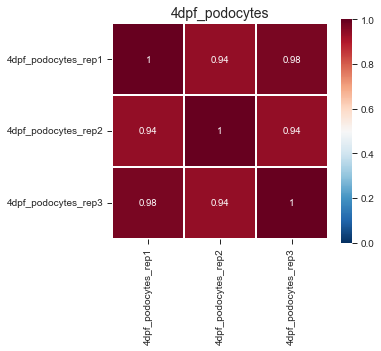

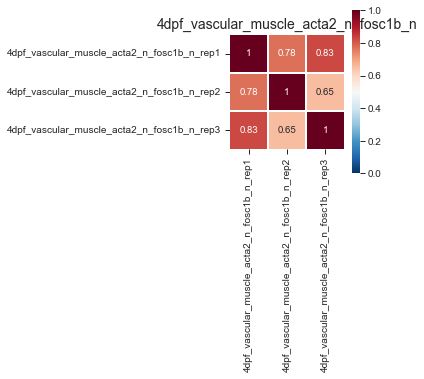

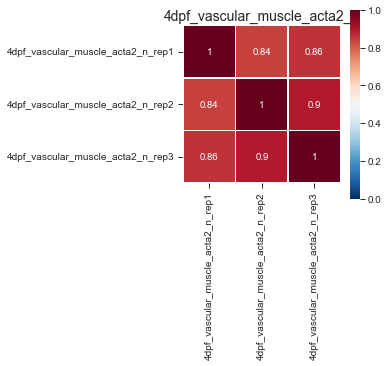

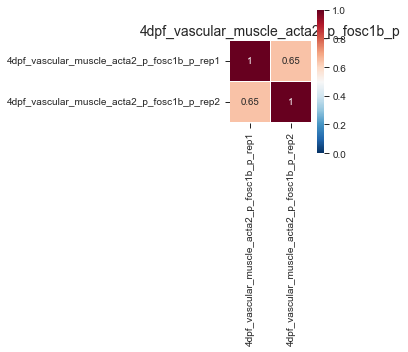

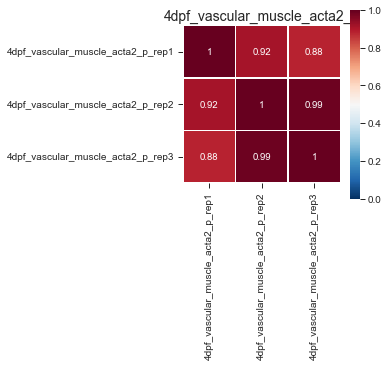

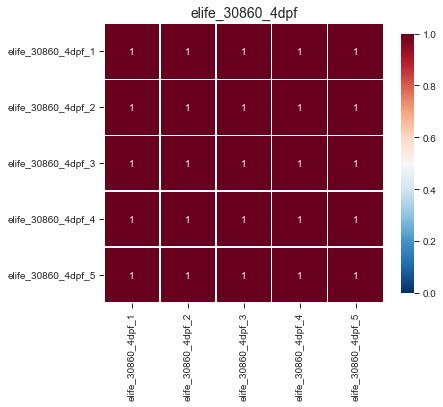

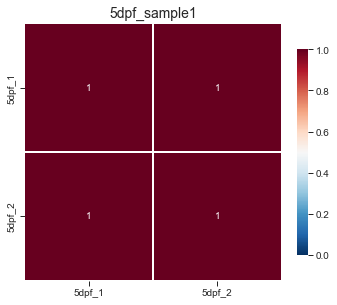

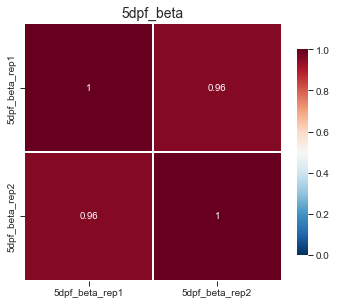

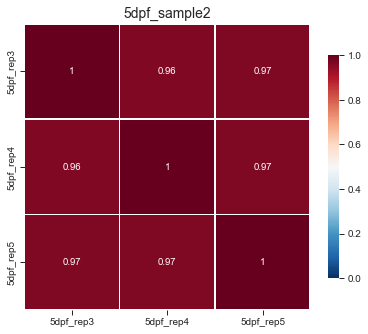

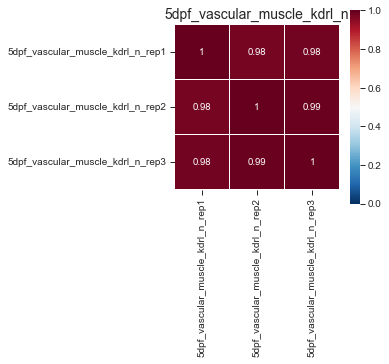

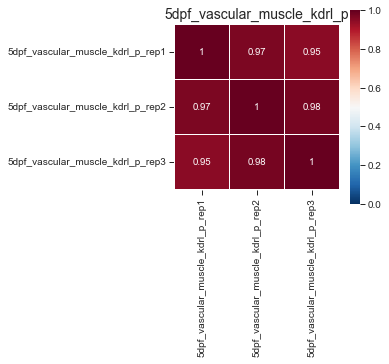

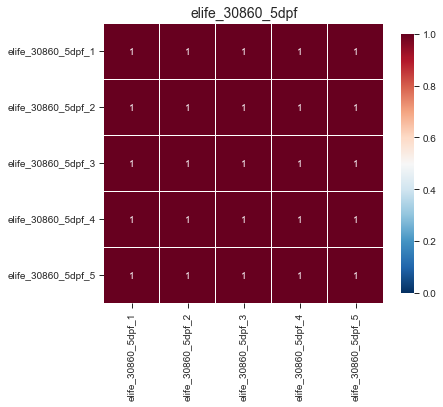

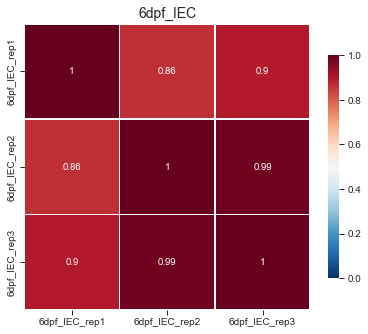

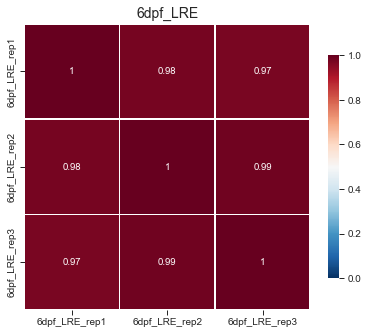

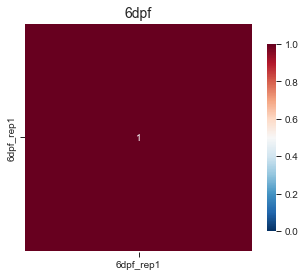

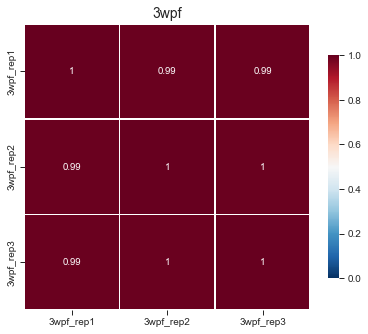

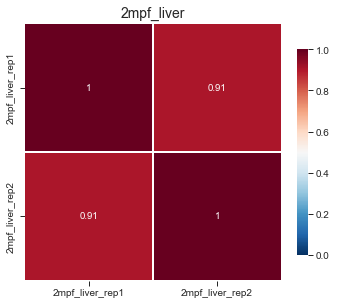

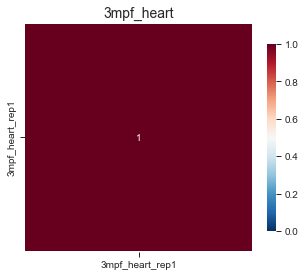

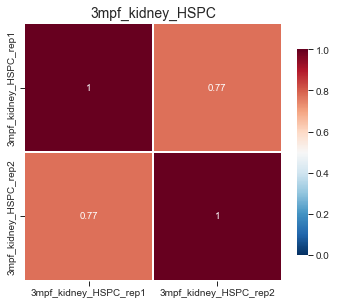

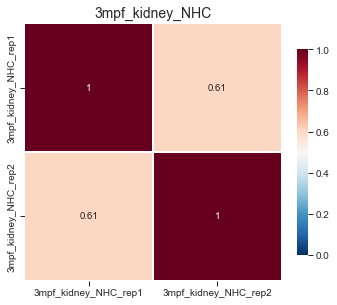

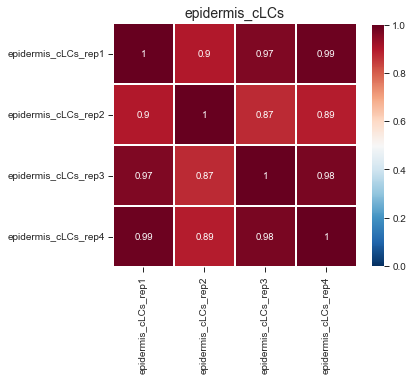

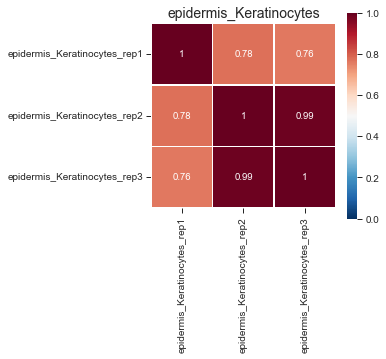

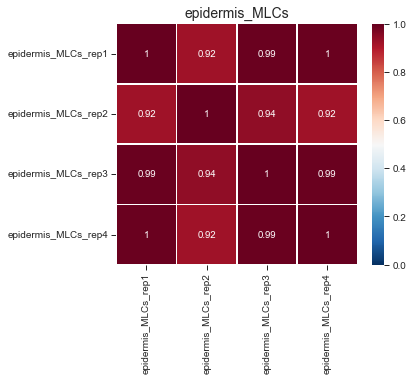

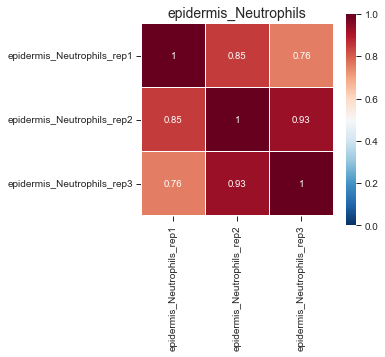

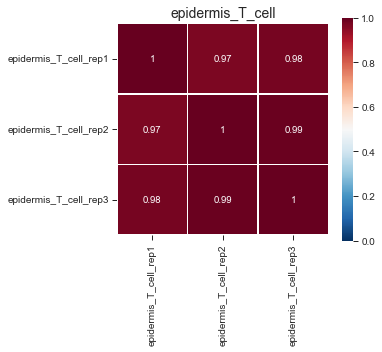

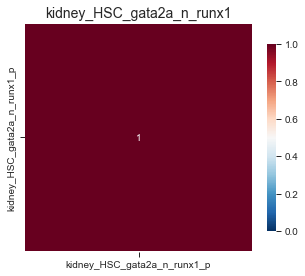

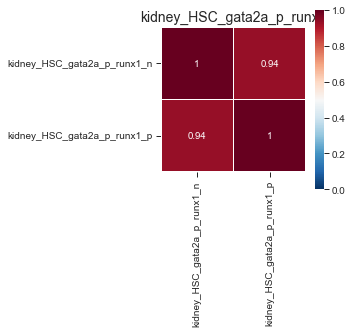

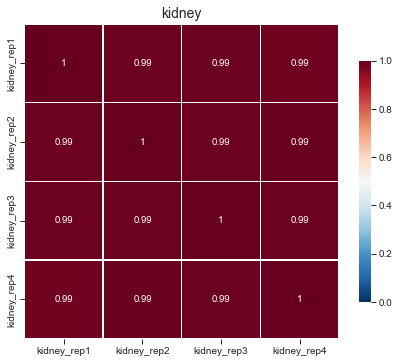

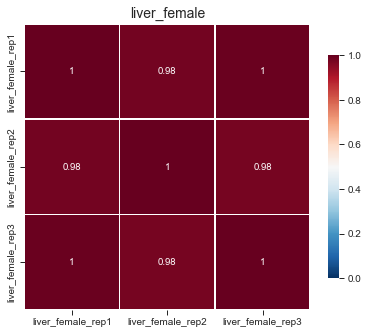

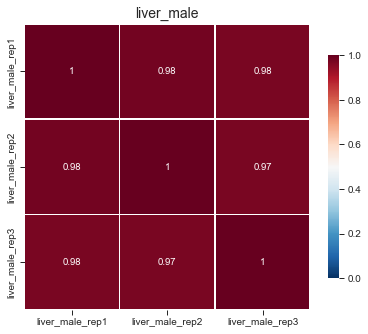

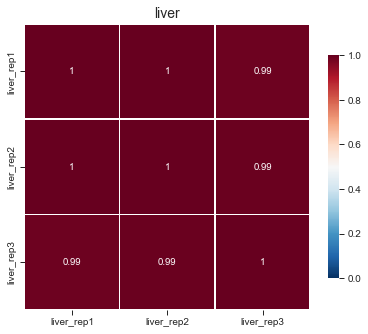

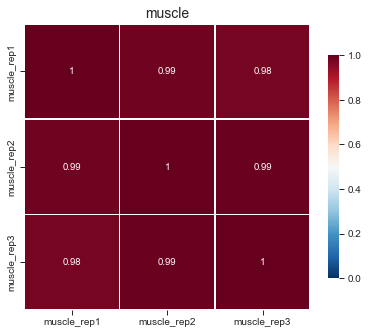

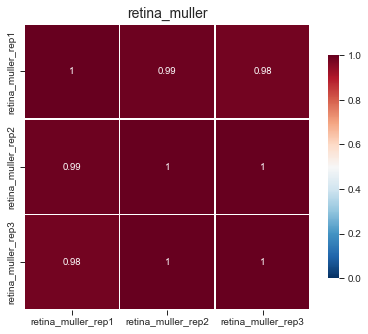

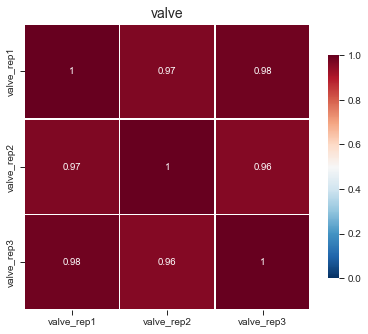

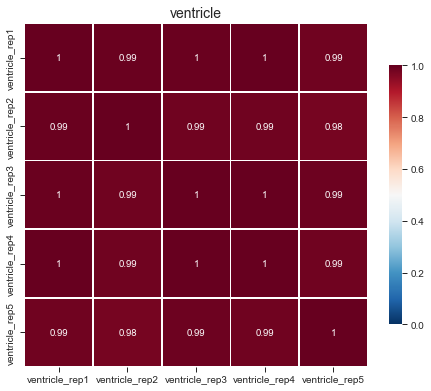

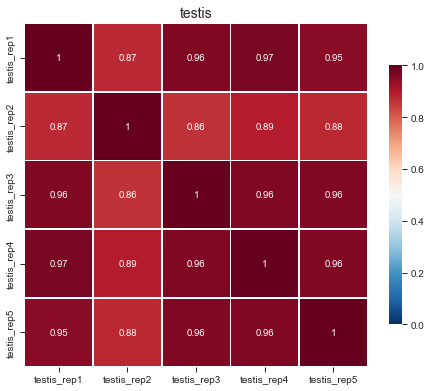

In [25]:
with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make1_repCorr_tissueBySamples_TPM_combat_byBatch.pdf') as pdf_pages :
    df_tmp = expr_combat_dict['lateEmbryo_tissue_TPM'].compute()
    for sample in lateEmbryo_tissue_TPM_samples_uniq :
#     for stage in ['oocyte'] :
    
        heatmap_tpm = df_tmp.loc[:,[x == sample for x in lateEmbryo_tissue_TPM_samples]]
        corr = heatmap_tpm.astype(float).corr()
        with sns.axes_style('white', rc={
                'xtick.bottom': True,
                'ytick.left': True
        }), sns.plotting_context('paper',
                                 rc={
                                     'axes.titlesize': 14,
                                     'axes.labelsize': 12,
                                     'xtick.labelsize': 10,
                                     'ytick.labelsize': 10,
                                     'legend.fontsize': 10
                                 }):
            fig, ax = plt.subplots(tight_layout = True, figsize=(4+corr.shape[0]*.5, 5+corr.shape[1]*.5))
            # Draw the heatmap with the mask and correct aspect ratio
            g = sns.heatmap(corr,
                        #mask=mask,
                        cmap='RdBu_r',
                        vmin=0,
                        vmax=1,
                        square=True,
                        linewidths=.5,
                        cbar_kws={"shrink": .5},
                        annot=True,
                        ax=ax
                        )
            ax.set_title(sample)
            
            pdf_pages.savefig(fig)

# rm low corr reps

## tissue

In [13]:
df_tmp = expr_combat_dict['lateEmbryo_tissue_TPM'].compute()

In [14]:
rep_low_corr_ls = []

for sample in lateEmbryo_tissue_TPM_samples_uniq :    
#     heatmap_tpm = df_tmp.iloc[:,:-2].loc[:, [x == sample for x in lateEmbryo_tissue_TPM_samples]]
    heatmap_tpm = df_tmp.loc[:, [x == sample for x in lateEmbryo_tissue_TPM_samples]]
    corr = heatmap_tpm.astype(float).corr()
    rep_low_corr_tmp = corr.loc[(corr.sum(axis = 0).astype(float) - 1) <= (corr.shape[1] - 1) * 0.8].index.tolist()
    rep_low_corr_ls += rep_low_corr_tmp
    
if rep_low_corr_ls :
    print(rep_low_corr_ls)
    

['24hpf_rep3', '36hpf_rep4', '4dpf_CHT_endothelial_rep1', '4dpf_CHT_endothelial_rep2', '4dpf_vascular_muscle_acta2_n_fosc1b_n_rep2', '4dpf_vascular_muscle_acta2_n_fosc1b_n_rep3', '4dpf_vascular_muscle_acta2_p_fosc1b_p_rep1', '4dpf_vascular_muscle_acta2_p_fosc1b_p_rep2', '6dpf_rep1', '3mpf_heart_rep1', '3mpf_kidney_HSPC_rep1', '3mpf_kidney_HSPC_rep2', '3mpf_kidney_NHC_rep1', '3mpf_kidney_NHC_rep2', 'epidermis_Keratinocytes_rep1', 'kidney_HSC_gata2a_n_runx1_p']


In [15]:
rep_low_corr_ls_tissue = rep_low_corr_ls

In [16]:
rep_high_corr_ls_tissue = lateEmbryo_tissue_TPM_samples.copy()
for x in rep_low_corr_ls_tissue :
    x = '36hpf_sample2_rep4' if x == '36hpf_rep4' else x
    rep_high_corr_ls_tissue.remove('_'.join(x.split('_')[:-1]))
    
print(len(rep_high_corr_ls_tissue))
                                  

192


In [17]:
# rep_high_corr_ls_tissue_uniq = lateEmbryo_tissue_TPM_samples_uniq.copy()
# for x in set(['_'.join(x.split('_')[:-1]) for x in rep_low_corr_ls_tissue]) :
#     x = '36hpf_sample2' if x == '36hpf' else x
#     rep_high_corr_ls_tissue_uniq.remove(x)
    
# print(len(rep_high_corr_ls_tissue_uniq))

a = np.array(rep_high_corr_ls_tissue)
_, idx = np.unique(a, return_index=True)
rep_high_corr_ls_tissue_uniq = a[np.sort(idx)]
len(rep_high_corr_ls_tissue_uniq)

64

In [18]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'] = expr_combat_dict['lateEmbryo_tissue_TPM'].drop(rep_low_corr_ls, axis = 1)
# expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].head()

In [19]:
expr_combat_dict['lateEmbryo_tissue_TPM'].shape

(Delayed('int-74ca1d04-b629-4c9f-931c-dcac0e32b077'), 208)

In [20]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].shape

(Delayed('int-abf9cabf-ca8f-4338-b162-4f36d300081a'), 192)

## embryo

If the mean rep corr thres is set to > 0.8, there is no need to run for early embryo. 

In [21]:
# expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'] = expr_combat_dict['ovary_earlyEmbryo_TPM']

In [22]:
df_tmp2 = expr_combat_dict['ovary_earlyEmbryo_TPM'].compute()

In [23]:
df_tmp2.head()

,oocyte_rep1,oocyte_rep2,1cell_rep1,1cell_rep2,1cell_rep3,1cell_rep4,1cell_rep5,1cell_rep6,1cell_rep7,elife_30860_1cell_1,...,elife_30860_16hpf_somites_3,elife_30860_16hpf_somites_4,elife_30860_16hpf_somites_5,elife_30860_19hpf_somites_1,elife_30860_19hpf_somites_2,elife_30860_19hpf_somites_3,elife_30860_19hpf_somites_4,elife_30860_19hpf_somites_5,20ss_allskin_rep1,20ss_allskin_rep2
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,3.865366,4.685386,0.439650,0.204631,0.267150,0.103481,0.108669,1.327847,1.480453,1.33363,...,0.654821,0.000000,0.883459,1.400422,0.361187,0.319557,0.000000,0.111712,0.639125,0.202818
ENSDART00000000004.5.2,0.216460,0.606344,1.099125,1.432420,2.404346,1.862662,2.499387,0.119166,0.144115,1.33363,...,0.545684,0.424128,0.441730,0.127311,0.481582,0.426076,0.386038,0.335135,0.106521,0.202818
ENSDART00000000004.5.3,11.503328,11.961515,15.937318,15.654302,14.426079,9.416790,11.627581,3.319618,2.764386,20.13782,...,2.946694,2.650803,1.987784,0.763867,2.287516,2.130378,2.058872,2.234233,2.023895,3.042277
ENSDART00000000004.5.4,0.000000,0.000000,0.549563,0.613894,0.534299,0.000000,0.543345,0.000000,0.000000,0.00000,...,0.000000,0.106032,0.000000,0.000000,0.000000,0.106519,0.000000,0.111712,0.213042,0.000000
ENSDART00000000004.5.5,0.000000,0.165367,1.758601,1.739367,1.602898,0.931331,1.195359,0.136189,0.052405,0.00000,...,0.000000,0.000000,0.000000,0.381933,0.000000,0.213038,0.386038,0.223423,0.000000,0.101409


In [24]:
rep_low_corr_ls = []

for stage in ovary_earlyEmbryo_TPM_stages_uniq :        
    heatmap_tpm = df_tmp2.loc[:, [x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    corr = heatmap_tpm.astype(float).corr()
    rep_low_corr_ls += corr.loc[(corr.sum(axis=1) - 1) / (corr.shape[0] - 1) <= 0.8].index.tolist()
    
if rep_low_corr_ls :
    print(rep_low_corr_ls)


['high_rep2']


In [25]:
rep_low_corr_ls_embryo = rep_low_corr_ls

In [26]:
rep_high_corr_ls_embryo = ovary_earlyEmbryo_TPM_stages[6:].copy()
for x in rep_low_corr_ls_embryo :
    rep_high_corr_ls_embryo.remove('_'.join(x.split('_')[:-1]))
    
print(len(rep_high_corr_ls_embryo))
                                  

109


In [27]:
# rep_high_corr_ls_embryo_uniq = ovary_earlyEmbryo_TPM_stages[6:].copy()
# for x in set(['_'.join(x.split('_')[:-1]) for x in rep_low_corr_ls_embryo]) :
#     rep_high_corr_ls_embryo_uniq.remove(x)
    
# rep_high_corr_ls_embryo_uniq = set(rep_high_corr_ls_embryo_uniq)
# print(len(rep_high_corr_ls_embryo_uniq))

a = np.array(rep_high_corr_ls_embryo)
_, idx = np.unique(a, return_index=True)
rep_high_corr_ls_embryo_uniq = a[np.sort(idx)]
len(rep_high_corr_ls_embryo_uniq)

24

In [28]:
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'] = expr_combat_dict['ovary_earlyEmbryo_TPM'].drop(rep_low_corr_ls, axis = 1)
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].shape

(Delayed('int-60b1fdc0-3297-4131-87bd-b86c83deb5c9'), 109)

In [29]:
expr_combat_dict['ovary_earlyEmbryo_TPM'].shape

(Delayed('int-ccdfcb4b-757a-4224-a054-f494533e0120'), 110)

In [30]:
print(rep_high_corr_ls_embryo_uniq.tolist() + rep_high_corr_ls_tissue_uniq.tolist())

['oocyte', '1_cell', '2_cell', '4_cell', '24_cell', '64_cell', '128_cell', '256_cell', '1k_cell', 'high', 'oblong', '4hpf', 'sphere', 'dome', '50epi', '6hpf', 'shield', '7hpf', '8hpf', 'bud', '10.33hpf', '16hpf', '19hpf', '20ss', '24hpf_pgc', '24hpf', '24hpf_somatic', 'elife_30860_24hpf', '28hpf', 'elife_30860_30hpf', '36hpf_endothelial', '36hpf_HSPC', '36hpf_neural_crest', '36hpf_NHC', '36hpf_sample1', '36hpf_sample2', 'elife_30860_36hpf', '36hpf_pgc', '36hpf_somatic', '2dpf', 'elife_30860_2dpf', '52hpf_allskin', '52hpf_basal', '52hpf_CHT_NHC', '52hpf_periderm', '56hpf_heart', '3dpf_CHT_endothelial', '3dpf_CHT_HSPC', '3dpf_CHT_NHC', '3dpf_kidney', '72hpf_allskin', '72hpf_basal', '72hpf_neural_crest', '72hpf_periderm', 'elife_30860_3dpf', '4dpf_CHT_HSPC', '4dpf_CHT_NHC', '4dpf_endothelial', '4dpf_podocytes', '4dpf_vascular_muscle_acta2_n_fosc1b_n', '4dpf_vascular_muscle_acta2_n', '4dpf_vascular_muscle_acta2_p', 'elife_30860_4dpf', '5dpf_sample1', '5dpf_beta', '5dpf_sample2', '5dpf_vasc

# calculate mean expr

## embryo

In [31]:
len(ovary_earlyEmbryo_TPM_stages_uniq[1:])

24

In [32]:
rep_high_corr_ls_embryo_uniq.tolist()

['oocyte',
 '1_cell',
 '2_cell',
 '4_cell',
 '24_cell',
 '64_cell',
 '128_cell',
 '256_cell',
 '1k_cell',
 'high',
 'oblong',
 '4hpf',
 'sphere',
 'dome',
 '50epi',
 '6hpf',
 'shield',
 '7hpf',
 '8hpf',
 'bud',
 '10.33hpf',
 '16hpf',
 '19hpf',
 '20ss']

In [33]:
i = 0
for stage in ovary_earlyEmbryo_TPM_stages_uniq[1:] :
#     cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[:-2][[x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[[x == stage for x in rep_high_corr_ls_embryo]]
    dd_mean = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'][cols].mean(axis = 1)
#     dd_mean.columns = [stage]
    if i == 0 :
        expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'] = dd_mean
    else :
        expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'] = dd.concat([expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'], 
                                                                           dd_mean], axis = 1)
    i += 1

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/dask/dataframe/multi.py:1093: UserWarning: Concatenating dataframes with unknown divisions.
We're assuming that the indexes of each dataframes are 
 aligned. This assumption is not generally safe.
  warnings.warn(


In [34]:
expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean'].columns = rep_high_corr_ls_embryo_uniq

## tissue

In [35]:
i = 0
for stage in rep_high_corr_ls_tissue_uniq :
#     cols = expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr'].columns[:-2][[x == stage for x in ovary_earlyEmbryo_TPM_stages[6:]]]
    cols = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].columns[[x == stage for x in rep_high_corr_ls_tissue]]
    dd_mean = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'][cols].mean(axis = 1)
#     dd_mean.columns = [stage]
    if i == 0 :
        expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'] = dd_mean
    else :
        expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'] = dd.concat([expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'], 
                                                                           dd_mean], axis = 1)
    i += 1

In [36]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].columns = rep_high_corr_ls_tissue_uniq

In [37]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].head()

,24hpf_pgc,24hpf,24hpf_somatic,elife_30860_24hpf,28hpf,elife_30860_30hpf,36hpf_endothelial,36hpf_HSPC,36hpf_neural_crest,36hpf_NHC,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,0.877880,0.591135,0.813520,0.837546,0.595260,0.817630,1.355526,1.580329,0.000000,0.000000,...,0.752801,0.245588,0.241550,0.319487,0.403899,0.675172,0.299799,2.366243,0.644551,0.477318
ENSDART00000000004.5.2,0.005048,0.393543,0.087161,0.427912,0.436699,0.361722,0.538415,0.106470,0.089543,0.119156,...,0.247522,0.395368,0.069391,0.428201,0.203877,0.112469,0.000000,1.599845,0.262800,0.657451
ENSDART00000000004.5.3,0.872775,2.560131,0.748501,2.421756,2.434576,2.528821,5.916095,2.030693,0.537259,5.007562,...,1.611993,4.372246,0.866363,1.252829,1.932349,1.836220,0.540581,4.256361,1.567938,3.647794
ENSDART00000000004.5.4,0.000000,0.144373,0.000000,0.000000,0.008257,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016405,0.000000,0.000000,0.000000,0.000000,0.032736
ENSDART00000000004.5.5,0.009850,0.393958,0.000000,0.150393,0.092750,0.089045,0.090081,0.000000,0.000000,0.060034,...,0.000000,0.000000,0.127925,0.302898,0.121655,0.024072,0.000000,0.578996,0.000000,0.524518


In [38]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr'].head()

,24hpf_pgc_rep1,24hpf_pgc_rep2,24hpf_pgc_rep3,24hpf_pgc_rep4,24hpf_rep1,24hpf_rep2,24hpf_rep4,24hpf_rep5,24hpf_rep6,24hpf_somatic_rep1,...,ventricle_rep1,ventricle_rep2,ventricle_rep3,ventricle_rep4,ventricle_rep5,testis_rep1,testis_rep2,testis_rep3,testis_rep4,testis_rep5
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000000004.5.1,1.110572,0.625360,1.105799,0.669791,0.193820,1.001666,0.534139,0.801344,0.424704,0.000000,...,1.254977,0.063711,0.399197,1.155277,0.349595,0.798314,0.485735,0.656953,0.327361,0.118229
ENSDART00000000004.5.2,0.020192,0.000000,0.000000,0.000000,0.193820,0.308205,0.534139,0.400672,0.530879,0.025519,...,0.386147,0.212371,0.415165,0.220862,0.079453,0.798314,0.242868,0.875937,0.818402,0.551733
ENSDART00000000004.5.3,1.554801,0.750432,1.067668,0.118198,3.004217,2.542691,2.243385,3.205375,1.804990,0.408310,...,1.608944,1.019379,2.027922,2.293564,0.889878,3.459360,2.185809,4.160699,4.255690,4.177410
ENSDART00000000004.5.4,0.000000,0.000000,0.000000,0.000000,0.193820,0.154103,0.106828,0.267115,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163680,0.000000
ENSDART00000000004.5.5,0.000000,0.000000,0.000000,0.039399,0.581461,0.616410,0.213656,0.133557,0.424704,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.532209,0.242868,0.437968,0.818402,0.591143


In [39]:
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis'] = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].drop('testis', axis = 1)
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_Testis'] = expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean'].testis.to_frame()
expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_Testis'].head()

,testis
exon_id,
ENSDART00000000004.5.1,0.477318
ENSDART00000000004.5.2,0.657451
ENSDART00000000004.5.3,3.647794
ENSDART00000000004.5.4,0.032736
ENSDART00000000004.5.5,0.524518


# filter exons less than 50bp

In [62]:
%%bash
cd ~/source/bySpecies/danRer11_2/ensGene/
awk 'BEGIN{FS=OFS="\t"} $7>=50{print}' danRer11_2.ensGene.exon_len.bed > ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed
wc -l ~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed

298888 /mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed


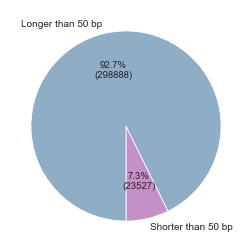

In [46]:
### pie plot

exon_len_ls = pd.read_csv(
    '/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.exon_len.bed',
    sep = "\t",
    header = None
)[6].to_list()

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    fig, ax = plt.subplots(figsize = (6.4 * .75, 4.8 * .75), tight_layout = True)
    
    sizes = [sum([x<50 for x in exon_len_ls]), 
             sum([x>=50 for x in exon_len_ls]),]
    ax.pie(sizes, 
           explode = [0, 0],
           labels = ['Shorter than 50 bp', 
                     'Longer than 50 bp', 
                    ],
#            autopct='%1.1f%%',
           autopct=lambda pct: func(pct, sizes),
           shadow = False, 
           startangle = -90,
           colors = ['#C490C6', '#90ADC6']
          )


In [41]:
exon_len_Over50 = dd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/danRer11_2.ensGene.exon_lenOver50.bed',
                              sep = '\t', usecols = [3], header = None).iloc[:,0]


In [52]:
for k in ['ovary_earlyEmbryo_TPM_highCorr_mean', 'lateEmbryo_tissue_TPM_highCorr_mean'] :
    expr_combat_dict[f'{k}_exonOver50'] = expr_combat_dict[k].compute().loc[exon_len_Over50.compute().tolist()]
    
expr_combat_dict[f'{k}_exonOver50']

,24hpf_pgc,24hpf,24hpf_somatic,elife_30860_24hpf,28hpf,elife_30860_30hpf,36hpf_endothelial,36hpf_HSPC,36hpf_neural_crest,36hpf_NHC,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
exon_id,,,,,,,,,,,,,,,,,,,,,
ENSDART00000164359.1.1,0.323582,1.182748,0.968488,0.475539,1.792035,0.480001,0.795890,0.490375,0.000000,0.344627,...,2.118979,0.755854,0.092570,0.096565,0.502730,0.488415,0.141342,0.023661,0.366625,0.532695
ENSDART00000164359.1.2_ENSDART00000157701.1.2_ENSDART00000167898.1.2,0.111785,70.199542,0.130271,0.113577,26.079889,0.136687,0.138357,0.094640,0.000000,0.015123,...,0.000000,0.054741,0.034036,0.000000,0.265982,0.090674,0.072658,2.128121,0.000000,73.813955
ENSDART00000164359.1.3_ENSDART00000167898.1.3,20.176813,168.198407,24.579145,165.306731,331.607746,151.615993,1.400017,5.212759,0.110779,1.572532,...,0.000000,1.108846,153.380505,166.807491,57.390211,0.908702,0.652502,0.047975,4.247592,119.193104
ENSDART00000164359.1.4_ENSDART00000167898.1.4,20.260854,125.632989,18.091724,80.003728,248.075991,79.812452,1.409372,2.151090,0.080567,1.468561,...,15.870243,1.362885,173.645319,154.766542,19.748900,0.301504,0.231726,54.582382,2.338696,77.993385
ENSDART00000164359.1.5,0.634522,39.374578,0.377050,0.409042,29.389751,0.682813,0.756154,2.267773,0.020142,2.449026,...,2.550592,1.176034,0.624519,0.733745,0.319121,0.295485,0.000000,102.331453,0.728728,2.863739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSDART00000181414.1_50.1_ENSDART00000186439.1_26.1_ENSDART00000185948.1_51.1_ENSDART00000180246.1_28.1_ENSDART00000189472.1_51.1_ENSDART00000182794.1_27.1_ENSDART00000186569.1_28.1_ENSDART00000127341.3_50.1_ENSDART00000181292.1_28.1_ENSDART00000185304.1_28.1_ENSDART00000193266.1_27.1_ENSDART00000179752.1_51.1_ENSDART00000188851.1_28.1_ENSDART00000189118.1_50.1,0.014581,0.021366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084213,0.000000,0.000000,0.000000,0.017383,0.000000,0.149900,0.000000,0.000000,0.000000
ENSDART00000181414.1_51.1_ENSDART00000186439.1_27.1_ENSDART00000185948.1_53.1_ENSDART00000180246.1_26.1_ENSDART00000189472.1_50.1_ENSDART00000182794.1_26.1_ENSDART00000186569.1_27.1_ENSDART00000127341.3_52.1_ENSDART00000181292.1_26.1_ENSDART00000185304.1_26.1_ENSDART00000193266.1_26.1_ENSDART00000179752.1_53.1_ENSDART00000188851.1_26.1_ENSDART00000189118.1_51.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSDART00000181414.1_52.1_ENSDART00000185948.1_50.1_ENSDART00000189472.1_52.1_ENSDART00000192349.1_24.1_ENSDART00000127341.3_54.1_ENSDART00000182981.1_25.1_ENSDART00000179752.1_50.1_ENSDART00000189118.1_52.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
for k in ['lateEmbryo_tissue_TPM_highCorr_mean_exTestis', 'lateEmbryo_tissue_TPM_highCorr_mean_Testis'] :
    expr_combat_dict[f'{k}_exonOver50'] = expr_combat_dict[k].compute().loc[exon_len_Over50.compute().tolist()]
    
expr_combat_dict[f'{k}_exonOver50']

,testis
exon_id,
ENSDART00000164359.1.1,0.532695
ENSDART00000164359.1.2_ENSDART00000157701.1.2_ENSDART00000167898.1.2,73.813955
ENSDART00000164359.1.3_ENSDART00000167898.1.3,119.193104
ENSDART00000164359.1.4_ENSDART00000167898.1.4,77.993385
ENSDART00000164359.1.5,2.863739
...,...
ENSDART00000181414.1_50.1_ENSDART00000186439.1_26.1_ENSDART00000185948.1_51.1_ENSDART00000180246.1_28.1_ENSDART00000189472.1_51.1_ENSDART00000182794.1_27.1_ENSDART00000186569.1_28.1_ENSDART00000127341.3_50.1_ENSDART00000181292.1_28.1_ENSDART00000185304.1_28.1_ENSDART00000193266.1_27.1_ENSDART00000179752.1_51.1_ENSDART00000188851.1_28.1_ENSDART00000189118.1_50.1,0.000000
ENSDART00000181414.1_51.1_ENSDART00000186439.1_27.1_ENSDART00000185948.1_53.1_ENSDART00000180246.1_26.1_ENSDART00000189472.1_50.1_ENSDART00000182794.1_26.1_ENSDART00000186569.1_27.1_ENSDART00000127341.3_52.1_ENSDART00000181292.1_26.1_ENSDART00000185304.1_26.1_ENSDART00000193266.1_26.1_ENSDART00000179752.1_53.1_ENSDART00000188851.1_26.1_ENSDART00000189118.1_51.1,0.000000
ENSDART00000181414.1_52.1_ENSDART00000185948.1_50.1_ENSDART00000189472.1_52.1_ENSDART00000192349.1_24.1_ENSDART00000127341.3_54.1_ENSDART00000182981.1_25.1_ENSDART00000179752.1_50.1_ENSDART00000189118.1_52.1,0.000000


## asign exon

In [54]:
# exon_id_ls = dd.DataFrame(zip(*pd.DataFrame(zip(*dd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.ExonUniq.gtf', 
#                                      sep = '\t', header = 0).iloc[:,8].drop_duplicates().str.split(';'))).T.iloc[:,0].drop_duplicates().str.split('"'))).T.iloc[:,1].tolist()

exon_id_ls = exon_len_Over50.compute()

There is some transcript id like "ENSDART00000139453.3_16.1" in Chr4.

In [55]:
exon_gene_id_dict = {}
exon_gene_id_dict_nonUniq = {}
for exon_id in set(exon_id_ls) :
    trans_ids = [('ENSDART'+x).strip('_') for x in exon_id.split('ENSDART') if x]    
    gene_ids = []
    for trans_id in trans_ids :
        gene_id_series = tr_gene_pd_clean.loc[tr_gene_pd_clean['transcript_id_clean'] == trans_id.split('.')[0]]['gene_id_clean'].tolist()
        if gene_id_series : 
            gene_ids.append(gene_id_series[0])
        else :
            print(exon_id)
        
    if len(set(gene_ids)) == 1 :
        exon_gene_id_dict[exon_id] = gene_ids[0]
    else :
#         print(gene_ids, exon_id)
        exon_gene_id_dict_nonUniq[exon_id] = gene_ids
        

In [56]:
len(exon_gene_id_dict)

297090

In [57]:
len(exon_gene_id_dict_nonUniq)

1798

In [58]:
len(set(exon_id_ls))

298888

In [75]:
exon_tr_gene_pd_clean = pd.merge(tr_gene_pd_clean, pd.DataFrame.from_dict(exon_gene_id_dict, orient='index').reset_index(), 
                                  left_on = 'gene_id_clean', right_on = 0).iloc[:,:-1]
exon_tr_gene_pd_clean.columns = ['transcript_id_clean', 'gene_id_clean', 'exon_id']
exon_tr_gene_pd_clean

,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.3_ENSDART00000167898.1.3
1,ENSDART00000164359,ENSDARG00000099104,ENSDART00000167898.1.1
2,ENSDART00000164359,ENSDARG00000099104,ENSDART00000158290.1.1_ENSDART00000157701.1.1
3,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.6
4,ENSDART00000164359,ENSDARG00000099104,ENSDART00000164359.1.4_ENSDART00000167898.1.4
...,...,...,...
1018618,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.2
1018619,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.6
1018620,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.4
1018621,ENSDART00000168273,ENSDARG00000104674,ENSDART00000168273.2.5


## candidate gene exons

In [76]:
candidate_maternal_trid_geneid_sym.head()

,transcript_id,gene_id,gene_symbol,transcript_id_clean
2479,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687
2480,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504
2481,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121
2482,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769
2483,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282


In [78]:
candidate_maternal_trid_geneid_sym_exon = pd.merge(candidate_maternal_trid_geneid_sym, exon_tr_gene_pd_clean, on = 'transcript_id_clean')
candidate_maternal_trid_geneid_sym_exon

,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean,exon_id
0,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.7_ENSDART00000152504.3.4_...
1,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152121.3.1
2,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.12_ENSDART00000152121.3.9...
3,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.1
4,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765,ENSDART00000152687.3.8_ENSDART00000152504.3.5_...
...,...,...,...,...,...,...
883,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.12_ENSDART00000132295.4.12
884,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.16_ENSDART00000132295.4.16
885,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.23_ENSDART00000132295.4.23
886,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387,ENSDART00000176057.2.2_ENSDART00000132295.4.2


In [190]:
for k in ['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50', 
          'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50',
          'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50',
          'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50'
         ] :
    tmp_df = expr_combat_dict[k].copy()
#     tmp_df['exon_id'] = tmp_df.index
    tmp_df = tmp_df.reset_index()
    expr_combat_dict[f'{k}_candidate'] = pd.merge(tmp_df, candidate_maternal_trid_geneid_sym_exon, on = 'exon_id')
    
expr_combat_dict[f'{k}_candidate']

,exon_id,testis,transcript_id,gene_id,gene_symbol,transcript_id_clean,gene_id_clean
0,ENSDART00000152687.3.1,0.117485,ENSDART00000152687.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152687,ENSDARG00000089765
1,ENSDART00000152687.3.1,0.117485,ENSDART00000152504.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152504,ENSDARG00000089765
2,ENSDART00000152687.3.1,0.117485,ENSDART00000152121.3,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152121,ENSDARG00000089765
3,ENSDART00000152687.3.1,0.117485,ENSDART00000152769.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152769,ENSDARG00000089765
4,ENSDART00000152687.3.1,0.117485,ENSDART00000152282.2,ENSDARG00000089765.4,si:ch211-286b5.4,ENSDART00000152282,ENSDARG00000089765
...,...,...,...,...,...,...,...
883,ENSDART00000176057.2.36_ENSDART00000132295.4.36,0.000000,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387
884,ENSDART00000132295.4.1,0.112782,ENSDART00000176057.2,ENSDARG00000056387.8,rnf17,ENSDART00000176057,ENSDARG00000056387
885,ENSDART00000132295.4.1,0.112782,ENSDART00000132295.4,ENSDARG00000056387.8,rnf17,ENSDART00000132295,ENSDARG00000056387
886,ENSDART00000132295.4.37,0.000000,ENSDART00000176057.2,ENSDARG00000056387.8,rnf17,ENSDART00000176057,ENSDARG00000056387


## candidate exon distribution

In [80]:
list(expr_combat_dict.keys())

['ovary_earlyEmbryo_TPM',
 'lateEmbryo_tissue_TPM',
 'lateEmbryo_tissue_TPM_highCorr',
 'ovary_earlyEmbryo_TPM_highCorr',
 'ovary_earlyEmbryo_TPM_highCorr_mean',
 'lateEmbryo_tissue_TPM_highCorr_mean',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis',
 'ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50',
 'ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate',
 'lateEmbryo_tissue_TPM_highCorr_mean_Testis_exonOver50_candidate']

In [191]:
pd.merge(pd.DataFrame(expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].max(axis = 1, numeric_only=True).tolist(), 
                      expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate']['gene_id_clean']).reset_index().groupby('gene_id_clean').max().reset_index(),
         candidate_maternal_trid_geneid_sym_exon[['gene_id_clean', 'gene_symbol']].drop_duplicates(), on = 'gene_id_clean'
        ).sort_values(0)

,gene_id_clean,0,gene_symbol
8,ENSDARG00000039937,3.492568,ccdc172
20,ENSDARG00000089765,9.291993,si:ch211-286b5.4
16,ENSDARG00000076391,10.241845,npm2a
21,ENSDARG00000089856,10.470002,cita
12,ENSDARG00000056387,11.713801,rnf17
18,ENSDARG00000087166,13.326300,figla
1,ENSDARG00000020354,13.481507,lmx1a
11,ENSDARG00000056339,18.277352,stk31
22,ENSDARG00000097302,25.550925,tbpl2
6,ENSDARG00000038812,34.963598,e2f5


In [192]:
pd.merge(pd.DataFrame(expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate'].max(axis = 1, numeric_only=True).tolist(), 
                      expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate']['gene_id_clean']).reset_index().groupby('gene_id_clean').min().reset_index(),
         candidate_maternal_trid_geneid_sym_exon[['gene_id_clean', 'gene_symbol']].drop_duplicates(), on = 'gene_id_clean'
        ).sort_values(0)

,gene_id_clean,0,gene_symbol
23,ENSDARG00000104170,0.006878,si:dkey-208k4.2
10,ENSDARG00000044956,0.013828,zgc:114123
20,ENSDARG00000089765,0.021366,si:ch211-286b5.4
9,ENSDARG00000042215,0.026185,pias4b
1,ENSDARG00000020354,0.029682,lmx1a
15,ENSDARG00000076214,0.033682,zgc:165514
7,ENSDARG00000039217,0.034792,orc1
17,ENSDARG00000077178,0.037316,zgc:152977
2,ENSDARG00000026972,0.049861,si:ch211-119o8.6
12,ENSDARG00000056387,0.061164,rnf17


### wo testis (not used)

In [255]:
candidate_expr_total_df = pd.concat([
    expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,:-5],
    expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50_candidate'].iloc[:,1:]
], axis = 1)

<ipython-input-305-3e1073ab22c9>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)


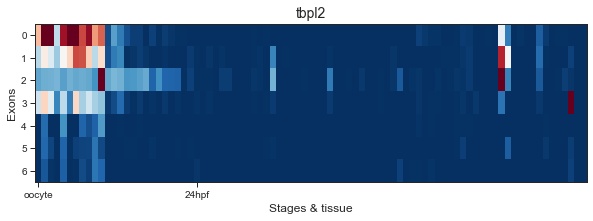

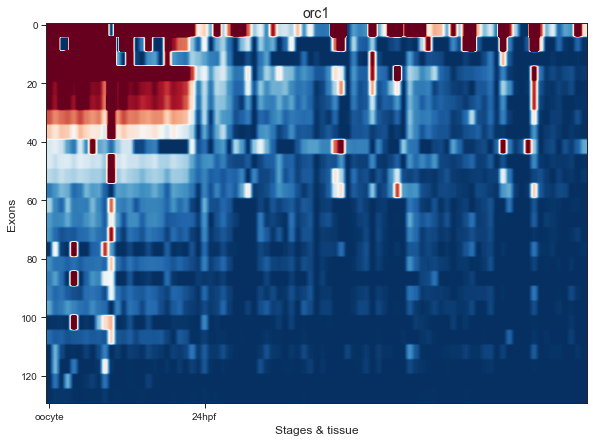

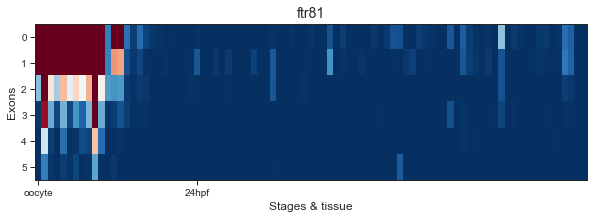

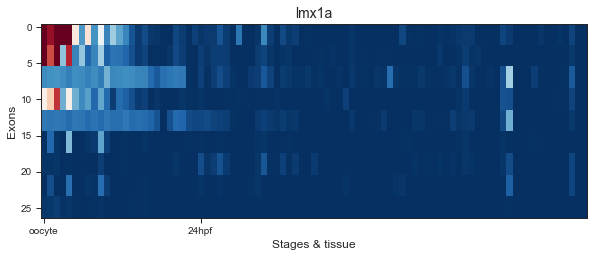

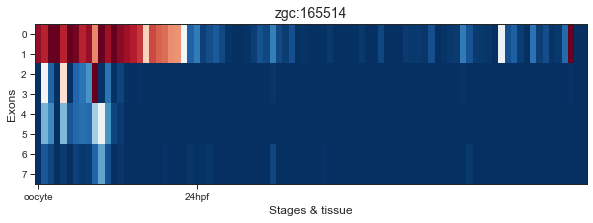

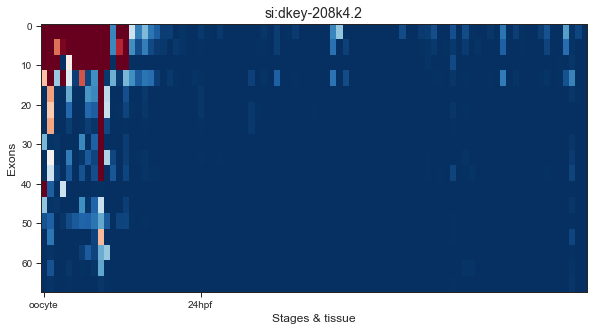

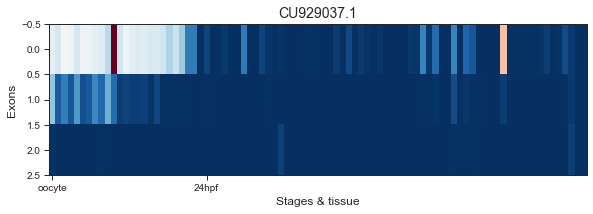

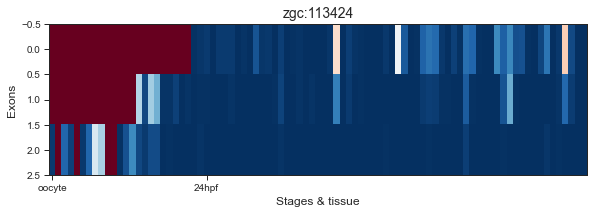

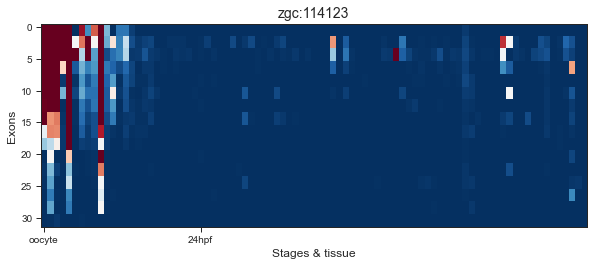

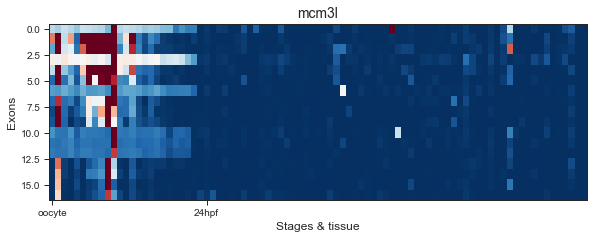

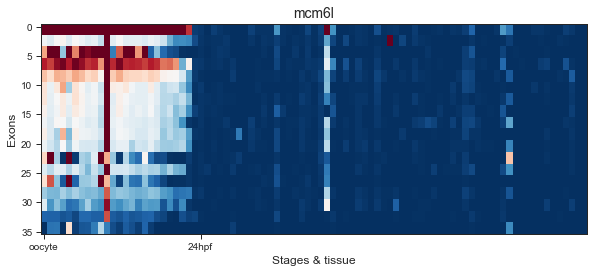

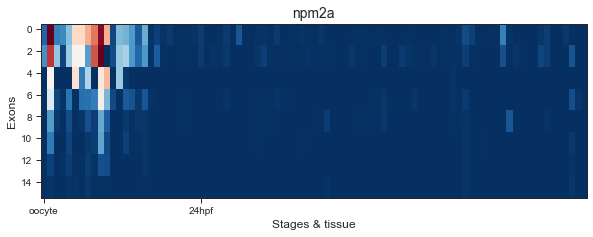

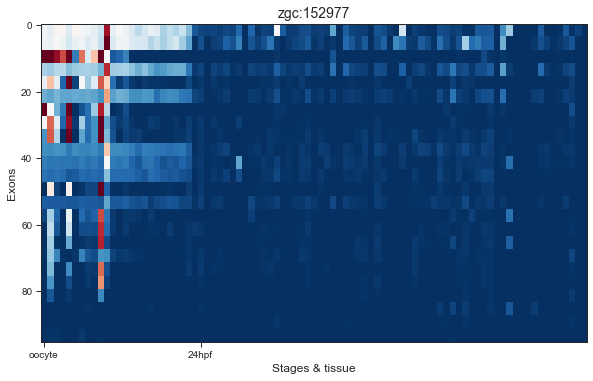

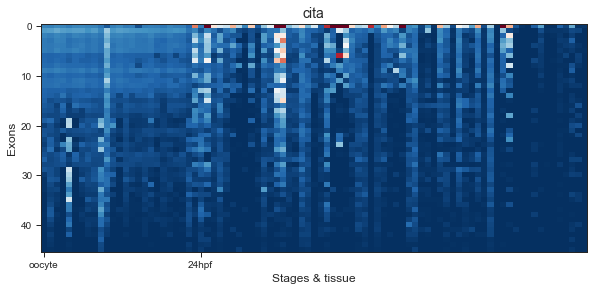

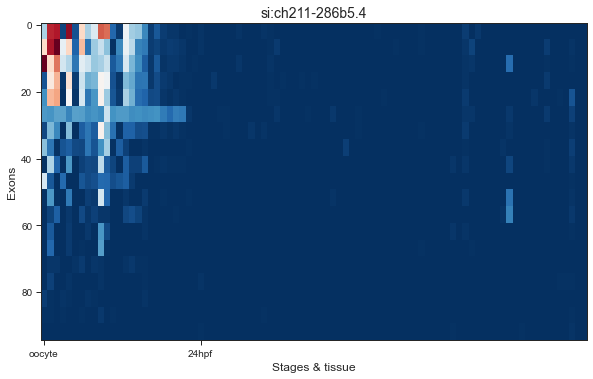

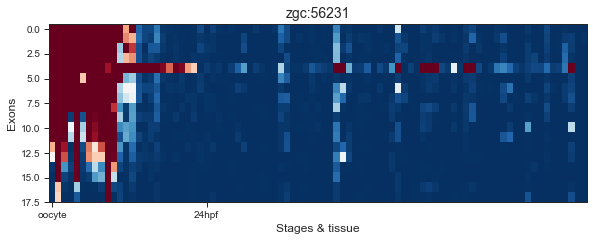

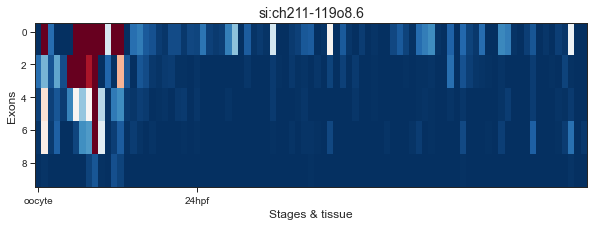

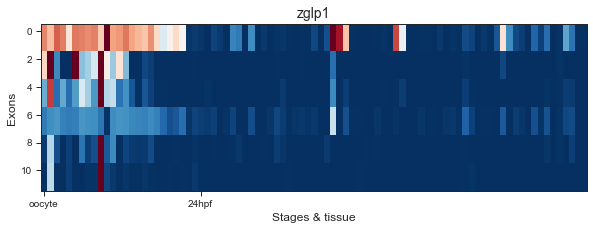

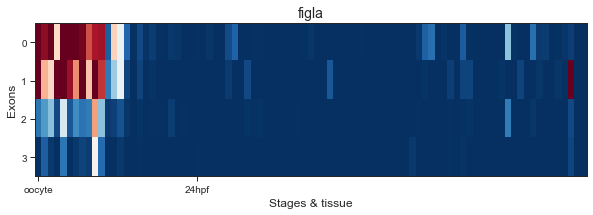

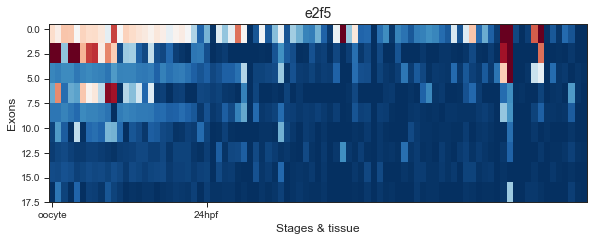

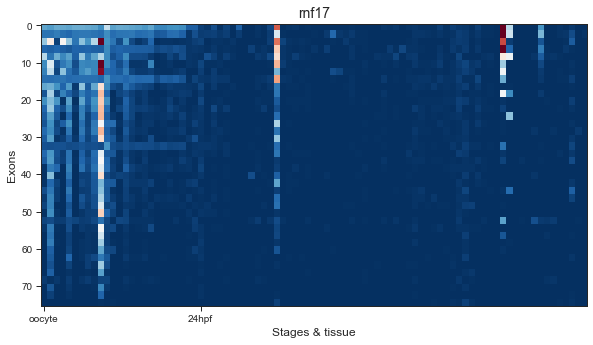

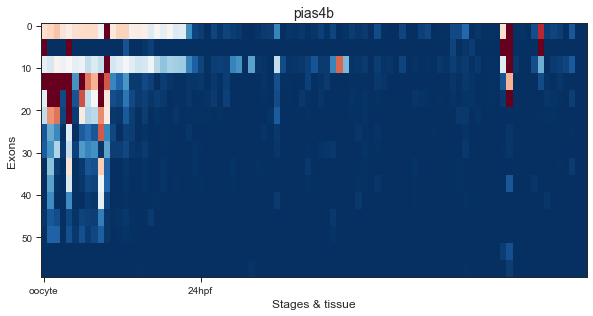

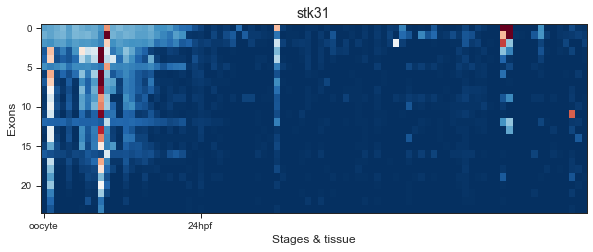

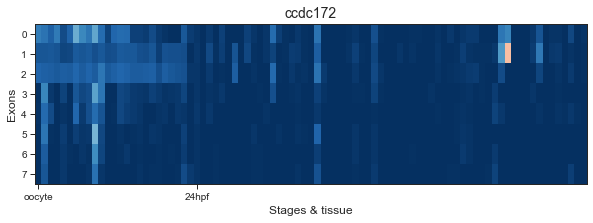

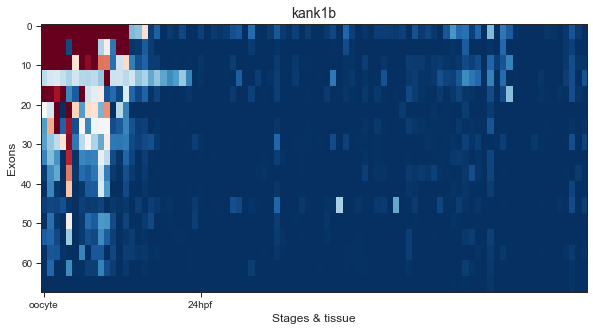

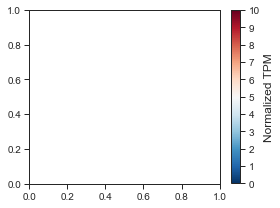

In [305]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_candidate_expr.pdf') as pdf_pages :
        for gene in candidate_maternal_gene_ls + ['bar'] :
            if gene != 'bar' :
                plot_df = candidate_expr_total_df.iloc[:, 1:-5].loc[candidate_expr_total_df['gene_symbol'] == gene]
                plot_df['rank'] = plot_df.mean(axis = 1)
                plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
                fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3+plot_df.shape[0]*.025), tight_layout = True)
                pos = ax.imshow(plot_df,
                              aspect = 'auto',
                              vmax = 10,
                              vmin = 0,
                              cmap = 'RdBu_r'
                            )

    #             ax.set_yticks(range(1, plot_df.shape[0]+1, 5))
    #             ax.set_yticklabels()
                ax.set_ylabel('Exons')
    #             ax.set_xticks(range(plot_df.shape[1]))
                ax.set_xticks([0,25])
                ax.set_xticklabels(['oocyte', '24hpf'])
                ax.set_xlabel('Stages & tissue')
                ax.set_title(gene)
            else :
                fig, ax = plt.subplots(figsize = (4, 3), tight_layout = True)
                cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
                cbar.set_label('Normalized TPM')
                cbar.ax.set_yticklabels([str(x) for x in range(11)])                 
        

            pdf_pages.savefig(fig)
    

### wi testis

In [193]:
candidate_expr_total_df = pd.concat([
    expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,:-5],
    expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exonOver50_candidate'].iloc[:,1:]
], axis = 1)

In [240]:
ovary_earlyEmbryo_TPM_stages_uniq[14+1]

'50epi'

In [253]:
rep_high_corr_ls_tissue_uniq[73-24]

'epidermis_cLCs'

<ipython-input-225-8ddcfb566003>:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3.2+plot_df.shape[0]*.025), tight_layout = True)


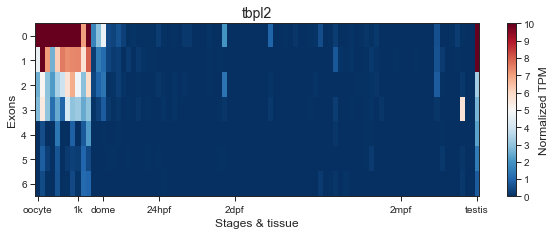

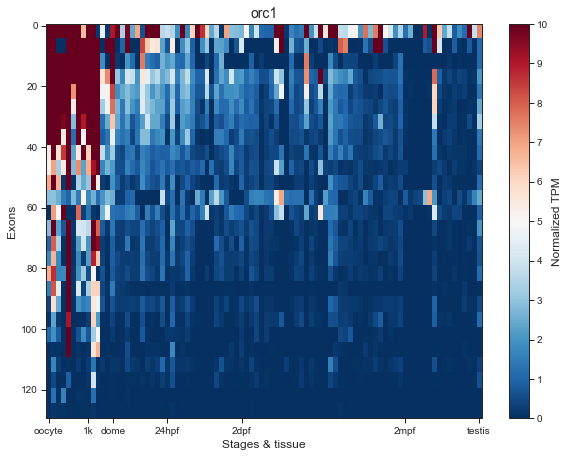

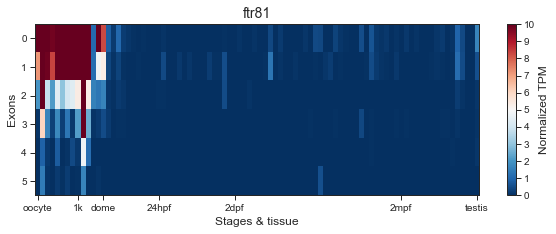

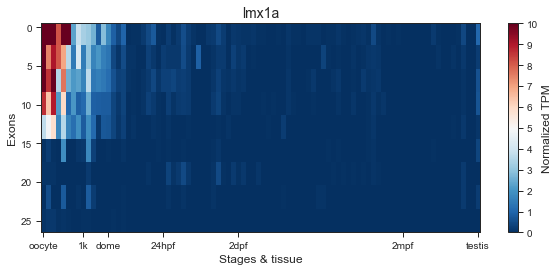

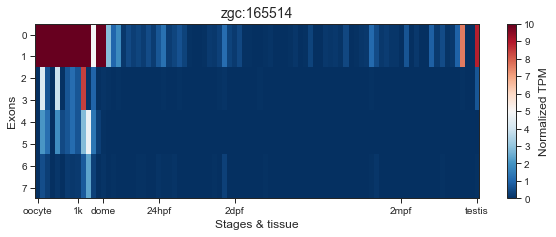

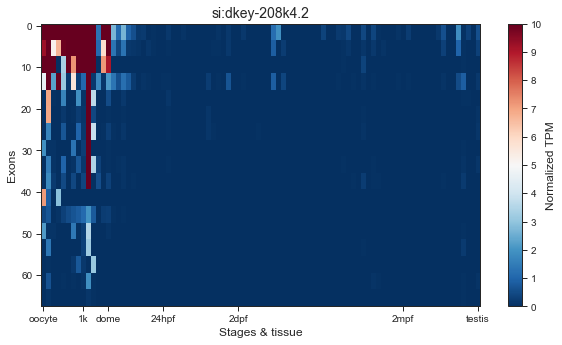

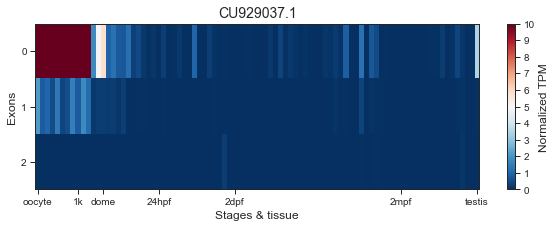

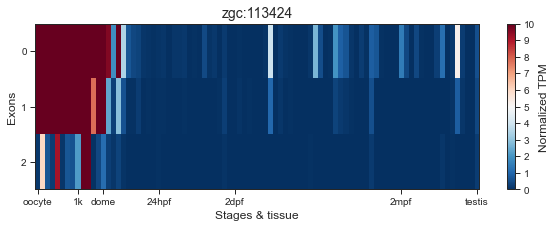

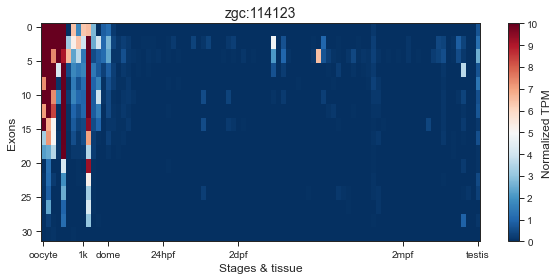

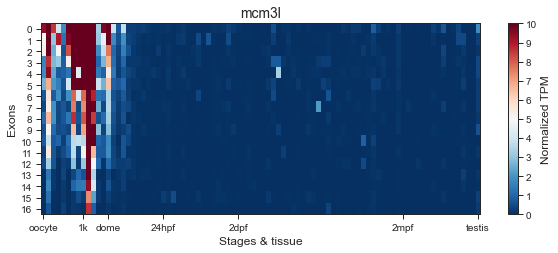

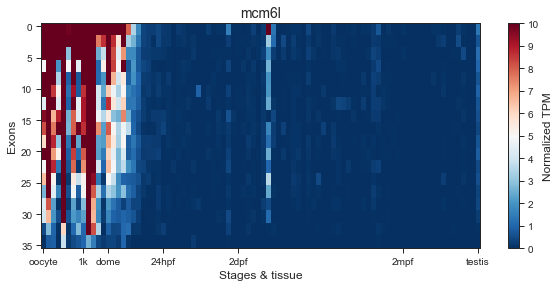

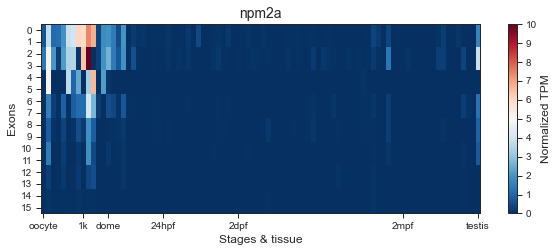

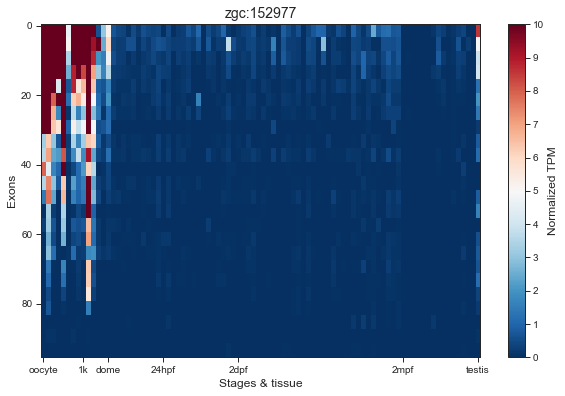

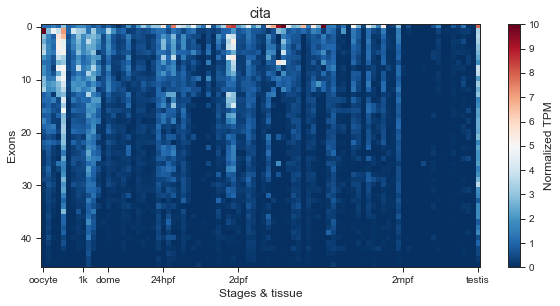

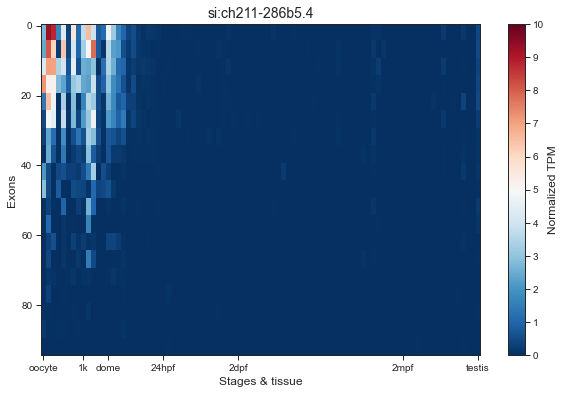

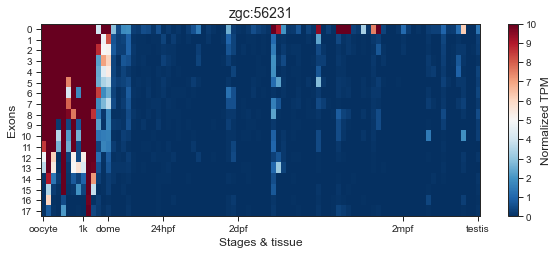

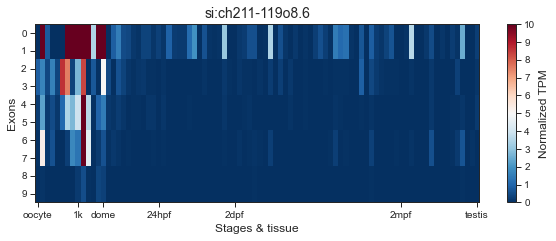

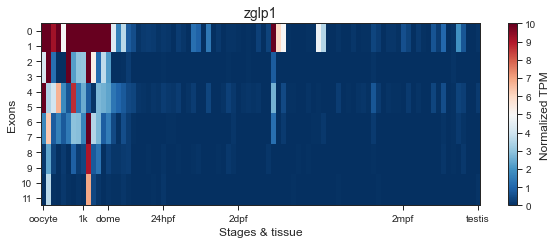

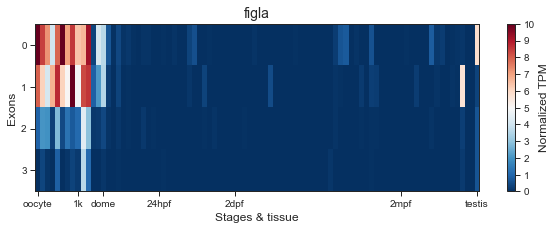

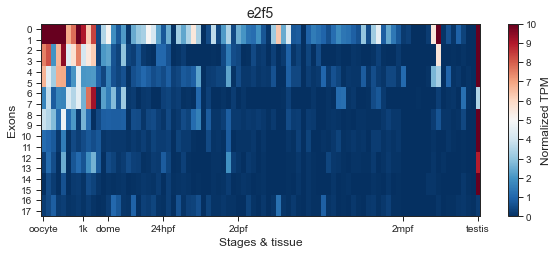

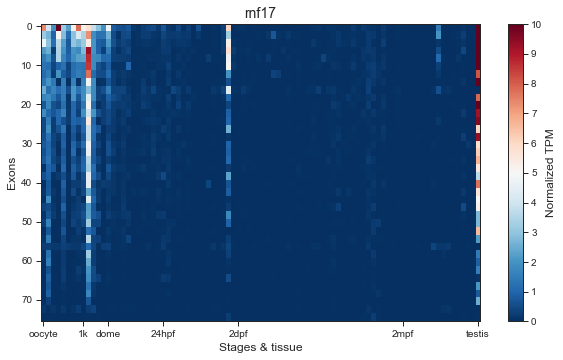

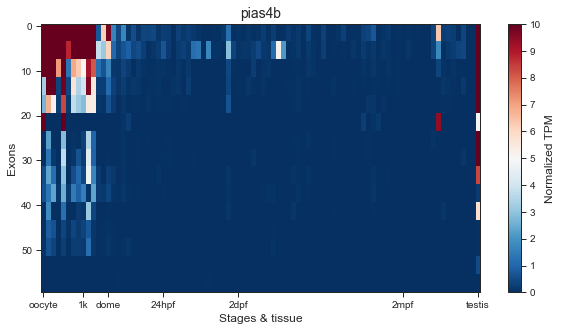

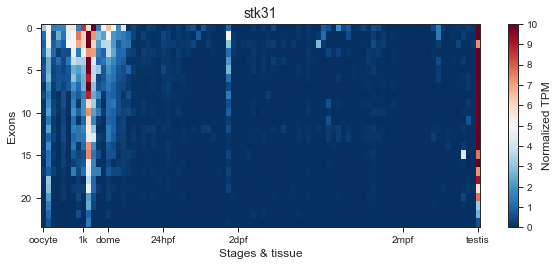

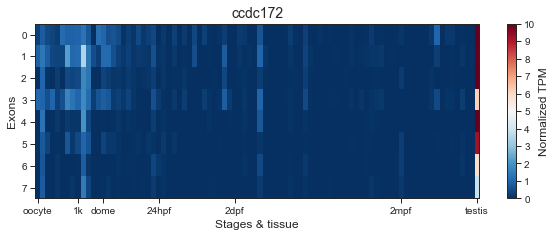

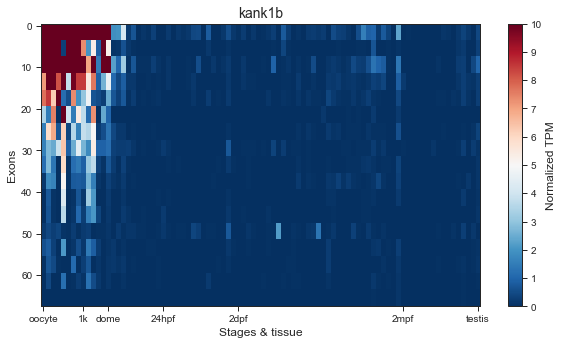

In [225]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    
    with PdfPages(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_candidate_expr_wiTestis.pdf') as pdf_pages :
        for gene in candidate_maternal_gene_ls :
            plot_df = candidate_expr_total_df.iloc[:, 1:-5].loc[candidate_expr_total_df['gene_symbol'] == gene]
            plot_df['rank'] = plot_df.mean(axis = 1)
            plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
            fig, ax = plt.subplots(figsize = (4+plot_df.shape[1]*.05, 3.2+plot_df.shape[0]*.025), tight_layout = True)
            pos = ax.imshow(plot_df,
                          aspect = 'auto',
                          vmax = 10,
                          vmin = 0,
                          cmap = 'RdBu_r'
                        )
            if plot_df.shape[0] <= 20 :
                ax.set_yticks(range(0, plot_df.shape[0]))
#                 ax.set_yticklabels()
            ax.set_ylabel('Exons')
#             ax.set_xticks(range(plot_df.shape[1]))
            ax.set_xticks([0,8,13,24, 39,72,87])
            ax.set_xticklabels(['oocyte', '1k', 'dome', '24hpf', '2dpf', '2mpf', 'testis'])
            ax.set_xlabel('Stages & tissue')
            ax.set_title(gene)
            cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
            cbar.set_label('Normalized TPM')
            cbar.ax.set_yticklabels([str(x) for x in range(11)])     

        

            pdf_pages.savefig(fig)
    

In [319]:
3.343 / 4

0.83575

In [ ]:
len(['oocyte'] * 2 + ['1_cell'] * 12 + ['2_cell'] * 5 + ['4_cell'] * 2 + ['24_cell'] * 2 + ['64_cell'] * 2 + ['128_cell'] * 5)

# filtering

## threshold

In [357]:
10 ** 6 / 298888

3.3457348572040364

In [396]:
10 ** 6 / 298888 * 1.5

5.018602285806055

In [397]:
10 ** 6 / 298888 * 0.25

0.8364337143010091

## filtering

## wo testis (not used)

In [118]:
# tmp_df = pd.DataFrame(expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exTestis_exonOver50'].max(axis = 1, numeric_only=True))
# tmp_df = pd.merge(tmp_df.loc[tmp_df[0] < 0.84].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
# print(len(tmp_df['exon_id'].unique()), len(tmp_df['gene_id_clean'].unique()))

# tmp_df2 = pd.DataFrame(expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50'].max(axis = 1, numeric_only=True))
# tmp_df2 = pd.merge(tmp_df2.loc[tmp_df2[0] > 5.02].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
# print(len(tmp_df2['exon_id'].unique()), len(tmp_df2['gene_id_clean'].unique()))

# filtered_exon_gene_clean = pd.merge(tmp_df, tmp_df2, on = 'exon_id').drop_duplicates().drop('gene_id_clean_y', axis = 1)
# filtered_exon_gene_clean.columns = ['exon_id', 'lateEmbryoTissue_expr', 'gene_id_clean', 'earlyEmbryo_expr']
# filtered_exon_gene_clean = pd.merge(filtered_exon_gene_clean, gene_symbol_clean, on = 'gene_id_clean').iloc[:, [0,2,4,3,1]]

102893 23363
64103 14569


## wi testis

In [51]:
tmp_df = pd.DataFrame(expr_combat_dict['lateEmbryo_tissue_TPM_highCorr_mean_exonOver50'].max(axis = 1, numeric_only=True))
tmp_df = pd.merge(tmp_df.loc[tmp_df[0] < 0.84].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
print(len(tmp_df['exon_id'].unique()), len(tmp_df['gene_id_clean'].unique()))

tmp_df2 = pd.DataFrame(expr_combat_dict['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50'].max(axis = 1, numeric_only=True))
tmp_df2 = pd.merge(tmp_df2.loc[tmp_df2[0] > 5.02].reset_index(), exon_tr_gene_pd_clean.drop('transcript_id_clean', axis = 1), on = 'exon_id')
print(len(tmp_df2['exon_id'].unique()), len(tmp_df2['gene_id_clean'].unique()))

filtered_exon_gene_clean = pd.merge(tmp_df, tmp_df2, on = 'exon_id').drop_duplicates().drop('gene_id_clean_y', axis = 1)
filtered_exon_gene_clean.columns = ['exon_id', 'lateEmbryoTissue_expr', 'gene_id_clean', 'earlyEmbryo_expr']
filtered_exon_gene_clean = pd.merge(filtered_exon_gene_clean, gene_symbol_clean, on = 'gene_id_clean').iloc[:, [0,2,4,3,1]]

KeyError: 'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50'

In [227]:
filtered_exon_gene_clean

,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
0,ENSDART00000165693.1.3_ENSDART00000169744.1.2,ENSDARG00000102746,tmem39a,5.415009,0.121788
1,ENSDART00000109083.5.1,ENSDARG00000058962,txnl4b,5.541650,0.836547
2,ENSDART00000092324.5.7_ENSDART00000179970.1.7,ENSDARG00000063297,abcb6a,7.336979,0.602847
3,ENSDART00000092324.5.10_ENSDART00000179970.1.10,ENSDARG00000063297,abcb6a,7.252941,0.828998
4,ENSDART00000092324.5.13_ENSDART00000179970.1.13,ENSDARG00000063297,abcb6a,5.076204,0.455922
...,...,...,...,...,...
980,ENSDART00000154125.3_5.2,ENSDARG00000103283,si:dkey-238o14.7,5.926379,0.093560
981,ENSDART00000154125.3_5.3,ENSDARG00000103283,si:dkey-238o14.7,5.149618,0.081408
982,ENSDART00000154125.3_5.6,ENSDARG00000103283,si:dkey-238o14.7,13.285551,0.271359
983,ENSDART00000144849.3.3,ENSDARG00000095486,CU467646.2,27.489778,0.784810


In [521]:
filtered_exon_gene_clean.to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_GeneIDSymbol_maxExpr_mean_high_corr_exonOver50.tsv',
                               sep = "\t",
                               header = True,
                               index = False)

In [5]:
########## TPM > 6, TPM < 0.8

filtered_exon_gene_clean = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_GeneIDSymbol_maxExpr_mean_high_corr_exonOver50.tsv',
                               sep = "\t")
filtered_exon_gene_clean_TPM6_TPM0p8 = filtered_exon_gene_clean.copy()
filtered_exon_gene_clean_TPM6_TPM0p8 = filtered_exon_gene_clean_TPM6_TPM0p8.loc[(filtered_exon_gene_clean_TPM6_TPM0p8['earlyEmbryo_expr'] > 6) & (filtered_exon_gene_clean_TPM6_TPM0p8['lateEmbryoTissue_expr'] < 0.8)]
filtered_exon_gene_clean_TPM6_TPM0p8

,exon_id,gene_id_clean,gene_symbol,earlyEmbryo_expr,lateEmbryoTissue_expr
2,ENSDART00000092324.5.7_ENSDART00000179970.1.7,ENSDARG00000063297,abcb6a,7.336979,0.602847
7,ENSDART00000140398.2.6,ENSDARG00000037739,zgc:112980,22.789256,0.626675
9,ENSDART00000146065.4.15_ENSDART00000114876.5.8,ENSDARG00000063169,ubn1,7.492041,0.583217
11,ENSDART00000131423.2.1_ENSDART00000146769.3.1_...,ENSDARG00000093886,tmsb5,128.124962,0.599977
12,ENSDART00000146769.3.2,ENSDARG00000093886,tmsb5,56.002764,0.233621
...,...,...,...,...,...
978,ENSDART00000154125.3_4.6,ENSDARG00000103283,si:dkey-238o14.7,9.170970,0.218887
979,ENSDART00000154125.3_4.11,ENSDARG00000103283,si:dkey-238o14.7,24.225576,0.740239
982,ENSDART00000154125.3_5.6,ENSDARG00000103283,si:dkey-238o14.7,13.285551,0.271359
983,ENSDART00000144849.3.3,ENSDARG00000095486,CU467646.2,27.489778,0.784810


In [228]:
k1,k2 = ['ovary_earlyEmbryo_TPM_highCorr_mean_exonOver50',
         'lateEmbryo_tissue_TPM_highCorr_mean_exonOver50']
expr_filtered_exon_gene_clean_embryoTissue = pd.concat([expr_combat_dict[k1].loc[expr_combat_dict[k1].index.isin(filtered_exon_gene_clean['exon_id'])],
                                                        expr_combat_dict[k2].loc[expr_combat_dict[k2].index.isin(filtered_exon_gene_clean['exon_id'])]
                                                      ], axis = 1)
    
expr_filtered_exon_gene_clean_embryoTissue.to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50.tsv',
                                                  sep = "\t",)

In [7]:
########## TPM > 6, TPM < 0.8

expr_filtered_exon_gene_clean_embryoTissue = pd.read_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50.tsv',
                                                  sep = "\t", )
expr_filtered_exon_gene_clean_embryoTissue_TPM6_TPM0p8 = expr_filtered_exon_gene_clean_embryoTissue.copy()
expr_filtered_exon_gene_clean_embryoTissue_TPM6_TPM0p8 = expr_filtered_exon_gene_clean_embryoTissue_TPM6_TPM0p8.loc[expr_filtered_exon_gene_clean_embryoTissue_TPM6_TPM0p8['exon_id'].isin(filtered_exon_gene_clean_TPM6_TPM0p8['exon_id'])]
expr_filtered_exon_gene_clean_embryoTissue_TPM6_TPM0p8.to_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50_TPM6_TPM0p8.tsv',
                                                             sep = "\t", index = False)

In [229]:
len(filtered_exon_gene_clean['gene_symbol'].unique())

514

## overlap with ORF(>500bp) (not used)

In [262]:
filtered_exon_transcript_clean_ls = pd.merge(filtered_exon_gene_clean, exon_tr_gene_pd_clean, on = 'exon_id', )['transcript_id_clean'].unique()
len(filtered_exon_transcript_clean_ls)

1399

In [356]:
gtf_df = pd.read_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.ExonUniq.gtf',
                          sep = '\t',
                          names = ['chr', 'source', 'feature', 'start', 'end', 'point', 'strand', 'score', 'name']
                         )
exon_gtf_df = gtf_df.loc[gtf_df['feature'] == 'exon']
exon_gtf_df['exon_id'] = exon_gtf_df['name'].str.split('"', expand = True)[1]
exon_gtf_df

<ipython-input-356-39df20387dec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exon_gtf_df['exon_id'] = exon_gtf_df['name'].str.split('"', expand = True)[1]


,chr,source,feature,start,end,point,strand,score,name,exon_id
1,chr1,danRer11_2.ensGene.genePredExt,exon,6408,6760,.,-,.,"gene_id ""ENSDART00000164359.1.1""; transcript_i...",ENSDART00000164359.1.1
3,chr1,danRer11_2.ensGene.genePredExt,exon,6892,6955,.,-,.,"gene_id ""ENSDART00000164359.1.2_ENSDART0000015...",ENSDART00000164359.1.2_ENSDART00000157701.1.2_...
5,chr1,danRer11_2.ensGene.genePredExt,exon,9558,9694,.,-,.,"gene_id ""ENSDART00000164359.1.3_ENSDART0000016...",ENSDART00000164359.1.3_ENSDART00000167898.1.3
7,chr1,danRer11_2.ensGene.genePredExt,exon,10081,10191,.,-,.,"gene_id ""ENSDART00000164359.1.4_ENSDART0000016...",ENSDART00000164359.1.4_ENSDART00000167898.1.4
9,chr1,danRer11_2.ensGene.genePredExt,exon,11550,11625,.,-,.,"gene_id ""ENSDART00000164359.1.5""; transcript_i...",ENSDART00000164359.1.5
...,...,...,...,...,...,...,...,...,...,...
644821,chr4,danRer11_2.ensGene.genePredExt,exon,29904416,29904496,.,+,.,"gene_id ""ENSDART00000181414.1_50.1_ENSDART0000...",ENSDART00000181414.1_50.1_ENSDART00000186439.1...
644823,chr4,danRer11_2.ensGene.genePredExt,exon,30480489,30480569,.,-,.,"gene_id ""ENSDART00000181414.1_51.1_ENSDART0000...",ENSDART00000181414.1_51.1_ENSDART00000186439.1...
644825,chr4,danRer11_2.ensGene.genePredExt,exon,29920655,29920735,.,+,.,"gene_id ""ENSDART00000181414.1_52.1_ENSDART0000...",ENSDART00000181414.1_52.1_ENSDART00000185948.1...
644827,chr4,danRer11_2.ensGene.genePredExt,exon,30483454,30483534,.,-,.,"gene_id ""ENSDART00000181414.1_53.1_ENSDART0000...",ENSDART00000181414.1_53.1_ENSDART00000186439.1...


In [358]:
exon_gtf_df.loc[exon_gtf_df['exon_id'].isin(filtered_exon_gene_clean['exon_id'].unique())].to_csv('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon.danRer11_2.gtf',
                                                                                              sep = '\t',
                                                                                              header = False,
                                                                                              index = False)


In [302]:
gtf_df = pd.read_table('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2.ensGene.gtf',
                                   sep = "\t", names = ['chr', 'source', 'feature', 'start', 'end', 'point', 'strand', 'score', 'name']
                                  )
codon_start_end_df = gtf_df.loc[gtf_df['feature'].isin(['start_codon', 'stop_codon'])]
codon_start_end_df[['gene_id', 'transcript_id']] = codon_start_end_df['name'].str.split('"', expand = True)[[1,3]]
codon_start_end_df

/mnt/Storage/home/wangyiman/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,chr,source,feature,start,end,point,strand,score,name,gene_id,transcript_id
15,chr1,danRer11_2.ensGene.genePredExt,start_codon,11753,11755,.,-,0,"gene_id ""ENSDARG00000099104.1""; transcript_id ...",ENSDARG00000099104.1,ENSDART00000164359.1
16,chr1,danRer11_2.ensGene.genePredExt,stop_codon,6680,6682,.,-,0,"gene_id ""ENSDARG00000099104.1""; transcript_id ...",ENSDARG00000099104.1,ENSDART00000164359.1
55,chr1,danRer11_2.ensGene.genePredExt,start_codon,11998,12000,.,+,0,"gene_id ""ENSDARG00000102407.2""; transcript_id ...",ENSDARG00000102407.2,ENSDART00000166393.1
56,chr1,danRer11_2.ensGene.genePredExt,stop_codon,15961,15963,.,+,0,"gene_id ""ENSDARG00000102407.2""; transcript_id ...",ENSDARG00000102407.2,ENSDART00000166393.1
72,chr1,danRer11_2.ensGene.genePredExt,start_codon,11992,11994,.,+,0,"gene_id ""ENSDARG00000102407.2""; transcript_id ...",ENSDARG00000102407.2,ENSDART00000161842.1
...,...,...,...,...,...,...,...,...,...,...,...
1128177,chr4,danRer11_2.ensGene.genePredExt,start_codon,74111061,74111063,.,-,0,"gene_id ""ENSDARG00000032405.5""; transcript_id ...",ENSDARG00000032405.5,ENSDART00000049170.5
1128178,chr4,danRer11_2.ensGene.genePredExt,stop_codon,74107513,74107515,.,-,0,"gene_id ""ENSDARG00000032405.5""; transcript_id ...",ENSDARG00000032405.5,ENSDART00000049170.5
1128224,chr4,danRer11_2.ensGene.genePredExt,start_codon,74104726,74104728,.,-,0,"gene_id ""ENSDARG00000039302.9""; transcript_id ...",ENSDARG00000039302.9,ENSDART00000122459.3
1128242,chr4,danRer11_2.ensGene.genePredExt,start_codon,74092241,74092243,.,-,0,"gene_id ""ENSDARG00000039302.9""; transcript_id ...",ENSDARG00000039302.9,ENSDART00000174118.2


In [348]:
def calculate_ORF_len(x) :
    orf_len = 0
    y = x.sort_values(['start']).reset_index()
    if y.shape[0] >= 2 :
        if y['strand'][0] == y['strand'][1] :
            orf_len = y['end'].max() - y['start'].min() #if y['strand'][0] == "+" else y['end'][0] - y['start'][1]
        else :
            print(y['strand'])

    if orf_len :
        return pd.Series({
            'chr': y['chr'][0],
            'ORF_start': y['start'].min(), 
            'ORF_end': y['end'].max(), 
            'point': '.',
            'strand': y['strand'][0],
            'ORF_len': orf_len,
            'gene_id': y['gene_id'][0]
        }
        )
    else :
        return pd.Series({
            'chr': y['chr'][0],
            'ORF_start': y['start'].min(), 
            'ORF_end': y['end'].max(), 
            'point': '.',
            'strand': y['strand'][0],
            'ORF_len': 'Error',
            'gene_id': y['gene_id'][0]
        }
        )

In [349]:
orf_len_df = pd.DataFrame(codon_start_end_df.groupby('transcript_id').apply(calculate_ORF_len)).reset_index()

In [350]:
orf_len_df

,transcript_id,chr,ORF_start,ORF_end,point,strand,ORF_len,gene_id
0,ENSDART00000000004.5,chr9,34114749,34120905,.,-,6156,ENSDARG00000000001.6
1,ENSDART00000000005.7,chr9,34089156,34113209,.,+,24053,ENSDARG00000000002.8
2,ENSDART00000000042.11,chr2,50199813,50225460,.,-,25647,ENSDARG00000033231.9
3,ENSDART00000000069.8,chr12,33484596,33536386,.,+,51790,ENSDARG00000000068.9
4,ENSDART00000000070.7,chr24,22071678,22103432,.,-,31754,ENSDARG00000000069.7
...,...,...,...,...,...,...,...,...
44201,ENSDART00000193988.1,chr23,11866345,11921072,.,-,54727,ENSDARG00000076364.5
44202,ENSDART00000193989.1,chr17,10593816,10703926,.,+,110110,ENSDARG00000103746.2
44203,ENSDART00000193991.1,chr18,33791608,33795159,.,+,3551,ENSDARG00000076694.5
44204,ENSDART00000193992.1,chr5,13891857,14003866,.,+,112009,ENSDARG00000101482.3


In [436]:
orf_len_df_ov1000 = orf_len_df.loc[orf_len_df['ORF_len'] != 'Error']
orf_len_df_ov1000['ORF_len'] = orf_len_df_ov1000['ORF_len'].astype(int)
# orf_len_df_ov1000 = orf_len_df_ov1000.loc[orf_len_df_ov1000['ORF_len'] > 500]
orf_len_df_ov1000 = orf_len_df_ov1000.loc[orf_len_df_ov1000['ORF_len'] > 1000]
orf_len_df_ov1000['transcript_id_clean'] = orf_len_df_ov1000['transcript_id'].str.split('.', expand = True)[0]
orf_len_df_ov1000

<ipython-input-436-ad63d68575eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orf_len_df_ov1000['ORF_len'] = orf_len_df_ov1000['ORF_len'].astype(int)


,transcript_id,chr,ORF_start,ORF_end,point,strand,ORF_len,gene_id,transcript_id_clean
0,ENSDART00000000004.5,chr9,34114749,34120905,.,-,6156,ENSDARG00000000001.6,ENSDART00000000004
1,ENSDART00000000005.7,chr9,34089156,34113209,.,+,24053,ENSDARG00000000002.8,ENSDART00000000005
2,ENSDART00000000042.11,chr2,50199813,50225460,.,-,25647,ENSDARG00000033231.9,ENSDART00000000042
3,ENSDART00000000069.8,chr12,33484596,33536386,.,+,51790,ENSDARG00000000068.9,ENSDART00000000069
4,ENSDART00000000070.7,chr24,22071678,22103432,.,-,31754,ENSDARG00000000069.7,ENSDART00000000070
...,...,...,...,...,...,...,...,...,...
44201,ENSDART00000193988.1,chr23,11866345,11921072,.,-,54727,ENSDARG00000076364.5,ENSDART00000193988
44202,ENSDART00000193989.1,chr17,10593816,10703926,.,+,110110,ENSDARG00000103746.2,ENSDART00000193989
44203,ENSDART00000193991.1,chr18,33791608,33795159,.,+,3551,ENSDARG00000076694.5,ENSDART00000193991
44204,ENSDART00000193992.1,chr5,13891857,14003866,.,+,112009,ENSDARG00000101482.3,ENSDART00000193992


The filtered exon must overlap with ORFs over 1000bp-long, not just assigning to transcripts whose ORF are longer than 1000bp.

In [437]:
orf_len_df_ov1000.loc[orf_len_df_ov1000['transcript_id_clean'].isin(filtered_exon_transcript_clean_ls)] 

,transcript_id,chr,ORF_start,ORF_end,point,strand,ORF_len,gene_id,transcript_id_clean
2,ENSDART00000000042.11,chr2,50199813,50225460,.,-,25647,ENSDARG00000033231.9,ENSDART00000000042
52,ENSDART00000002027.11,chr9,42616165,42649452,.,+,33287,ENSDARG00000001733.12,ENSDART00000002027
65,ENSDART00000002166.8,chr10,34908713,34915735,.,-,7022,ENSDARG00000043236.7,ENSDART00000002166
115,ENSDART00000002750.9,chr13,35880664,35890873,.,-,10209,ENSDARG00000005454.9,ENSDART00000002750
121,ENSDART00000002787.10,chr20,52529146,52540673,.,+,11527,ENSDARG00000015236.10,ENSDART00000002787
...,...,...,...,...,...,...,...,...,...
43888,ENSDART00000193381.1,chr20,28423214,28433599,.,-,10385,ENSDARG00000110654.1,ENSDART00000193381
44076,ENSDART00000193747.1,chr2,30547135,30548220,.,+,1085,ENSDARG00000015589.10,ENSDART00000193747
44095,ENSDART00000193791.1,chr19,32979470,33070812,.,+,91342,ENSDARG00000035868.9,ENSDART00000193791
44118,ENSDART00000193834.1,chr2,44528255,44542248,.,+,13993,ENSDARG00000075008.7,ENSDART00000193834


In [421]:
orf_len_df.to_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2_ORF.bed',
                  columns = ['chr', 'ORF_start', 'ORF_end', 'point', 'strand', 'ORF_len', 'gene_id', 'transcript_id'],
                 sep = '\t',
                 index = False,
                 header = True)

In [438]:
orf_len_df_ov1000.to_csv('/mnt/Storage/home/wangyiman/source/bySpecies/danRer11_2/ensGene/danRer11_2_ORF_ov1000bp.bed',
                  columns = ['chr', 'ORF_start', 'ORF_end', 'point', 'strand', 'ORF_len', 'gene_id', 'transcript_id'],
                 sep = '\t',
                 index = False,
                 header = True)

In [439]:
%%bash
orf_fi=~/source/bySpecies/danRer11_2/ensGene/danRer11_2_ORF_ov1000bp.bed
filtered_bed=~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon.danRer11_2.gtf
wc -l $filtered_bed
out_fi=~/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon_overlap10percentORF1000.gtf
# bedtools intersect -u -f 0.001 -r -a $filtered_bed -b $orf_fi -wa > $out_fi
bedtools intersect -a $filtered_bed -b $orf_fi -wa -wb > $out_fi
cut -f16 $out_fi | sort | uniq > ${out_fi%%gtf}gene_id.txt
cut -f9 $out_fi | sort | uniq | wc -l

985 /mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon.danRer11_2.gtf
778


In [440]:
filtered_exon_ovORF1000 = pd.read_table('/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/filtered_exons/filtered_exon_overlap10percentORF500.gtf',
                                       sep = '\t', header = None, usecols = list(range(9)) + [14, 15],
                                       names = ['chr', 'source', 'feature', 'start', 'end', 'point', 'strand', 'score', 'name', 'ORF_len', 'gene_id'])
filtered_exon_ovORF1000['exon_id'] = filtered_exon_ovORF1000['name'].str.split('"', expand = True)[1]
filtered_exon_ovORF1000

,chr,source,feature,start,end,point,strand,score,name,ORF_len,gene_id,exon_id
0,chr1,danRer11_2.ensGene.genePredExt,exon,513986,514219,.,+,.,"gene_id ""ENSDART00000109083.5.1""; transcript_i...",3577,ENSDARG00000058962.6,ENSDART00000109083.5.1
1,chr1,danRer11_2.ensGene.genePredExt,exon,513986,514219,.,+,.,"gene_id ""ENSDART00000109083.5.1""; transcript_i...",3577,ENSDARG00000058962.6,ENSDART00000109083.5.1
2,chr1,danRer11_2.ensGene.genePredExt,exon,6148400,6148521,.,+,.,"gene_id ""ENSDART00000092324.5.7_ENSDART0000017...",20812,ENSDARG00000063297.5,ENSDART00000092324.5.7_ENSDART00000179970.1.7
3,chr1,danRer11_2.ensGene.genePredExt,exon,6148400,6148521,.,+,.,"gene_id ""ENSDART00000092324.5.7_ENSDART0000017...",20658,ENSDARG00000063297.5,ENSDART00000092324.5.7_ENSDART00000179970.1.7
4,chr1,danRer11_2.ensGene.genePredExt,exon,6151855,6151980,.,+,.,"gene_id ""ENSDART00000092324.5.10_ENSDART000001...",20812,ENSDARG00000063297.5,ENSDART00000092324.5.10_ENSDART00000179970.1.10
...,...,...,...,...,...,...,...,...,...,...,...,...
1403,chr4,danRer11_2.ensGene.genePredExt,exon,42014491,42014714,.,+,.,"gene_id ""ENSDART00000154125.3_5.2""; transcript...",3746,ENSDARG00000103283.2,ENSDART00000154125.3_5.2
1404,chr4,danRer11_2.ensGene.genePredExt,exon,42014491,42014714,.,+,.,"gene_id ""ENSDART00000154125.3_5.2""; transcript...",1332,ENSDARG00000104681.2,ENSDART00000154125.3_5.2
1405,chr4,danRer11_2.ensGene.genePredExt,exon,42014838,42015017,.,+,.,"gene_id ""ENSDART00000154125.3_5.3""; transcript...",3746,ENSDARG00000103283.2,ENSDART00000154125.3_5.3
1406,chr4,danRer11_2.ensGene.genePredExt,exon,42014838,42015017,.,+,.,"gene_id ""ENSDART00000154125.3_5.3""; transcript...",1332,ENSDARG00000104681.2,ENSDART00000154125.3_5.3


In [441]:
len(filtered_exon_ovORF1000['gene_id'].unique())

407

In [442]:
# filtered_exon_ovORF1000.loc[filtered_exon_ovORF1000['exon_id'].isin(candidate_maternal_geneid_sym_exon['exon_id'].unique())]
pd.merge(filtered_exon_ovORF1000, candidate_maternal_geneid_sym_exon, on = 'exon_id')['ORF_len'].min()

1071

In [444]:
pd.merge(filtered_exon_ovORF1000, candidate_maternal_geneid_sym_exon, on = 'exon_id')['gene_symbol'].unique().tolist()

['si:ch211-286b5.4',
 'zgc:152977',
 'ftr81',
 'zgc:165514',
 'si:dkey-208k4.2',
 'zgc:113424',
 'si:ch211-119o8.6',
 'mcm6l',
 'mcm3l',
 'lmx1a',
 'zgc:114123',
 'kank1b',
 'zglp1',
 'orc1',
 'zgc:56231',
 'npm2a']